In [1]:
import os
import glob
import importlib
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

In [2]:
import analyze2p.gratings.utils as gutils
import analyze2p.plotting as pplot
import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils as hutils

import analyze2p.decoding as dec

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
#### Plotting params
visual_areas, area_colors = pplot.set_threecolor_palette()
pplot.set_plot_params(axis_labelsize=6, lw_axes=0.25)
bw_colors = dict((v, [0.7]*3) for v in visual_areas)
#### Set trace ID and FOV/state type
# aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
# rootdir='/n/coxfs01/2p-data'
aggregate_dir = '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas'
rootdir = '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-data'

fov_type = 'zoom2p0x'
state = 'awake'
traceid = 'traces001'
# ----------------------------------------

In [4]:
%matplotlib notebook

In [5]:
experiment = 'blobs'
trial_epoch = 'stimulus'
responsive_test='ROC'
# ----------------------------------------
response_type='dff'
if responsive_test=='nstds':
    responsive_thr=7.0 if experiment=='rfs' else 10.
else:
    responsive_thr=0.05 if responsive_test=='ROC' else responsive_thr
resp_desc = '%s_responsive-%s-thr%.2f' \
                % (response_type, responsive_test, responsive_thr)
data_id = '|'.join([traceid, resp_desc])
print(data_id)
# ------------------------------------------------------------------
# Load all metdata and assigned cells
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
experiment_list = ['rfs10', 'rfs'] if experiment=='rfs' else [experiment]
meta = sdata[sdata.experiment.isin(experiment_list)].copy()
# CELLS = pd.concat([g for (va, dk), g in cells0.groupby(['visual_area', 'datakey'])\
#                 if not meta.query('@va == visual_area and @dk == datakey').empty])
# # Neural data
# NDATA0 = aggr.load_responsive_neuraldata(experiment, traceid=traceid,
#                       response_type=response_type, trial_epoch=trial_epoch,
#                       responsive_test=responsive_test, 
#                       responsive_thr=responsive_thr)
# if experiment not in ['rfs', 'rfs10']: # assigned in load_responsive_neuraldata()
#     NDATA0['experiment'] = experiment 

traces001|dff_responsive-ROC-thr0.05
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 12 dsets


In [6]:
C_value=1.0
test_split=0.2
cv_nfolds=5

chance_level = 1/8. if experiment=='gratings' else 0.5

In [7]:
analysis_type='by_ncells'
test_type='size_single'
class_name = 'morphlevel'
match_rfs = False
overlap_thr= 0.0 #0.0
greater_than=True

overlap_str = 'greaterthan' if greater_than else ''
test_str = 'default' if test_type is None else test_type
basedir = os.path.join(aggregate_dir, 'decoding', 'py3_%s' % analysis_type,
                      class_name, '%s' % test_str)
if not os.path.exists(basedir):
    os.makedirs(basedir)
print(basedir)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single


## Output dirs

In [8]:
aggr_id = dec.create_aggregate_id(C_value=C_value, 
                            trial_epoch=trial_epoch,
                            responsive_test=responsive_test,
                            match_rfs=match_rfs, overlap_thr=overlap_thr)
if overlap_thr is not None and isinstance(overlap_thr, (list, np.ndarray)) or match_rfs:
    curr_dst_dir = os.path.join(basedir, 'controls')
else:
    curr_dst_dir = os.path.join(basedir, aggr_id)
curr_dst_dir = curr_dst_dir + '2'

if not os.path.exists(curr_dst_dir):
    os.makedirs(curr_dst_dir)
print(curr_dst_dir)
print(aggr_id)

FIGDIR = os.path.join(aggregate_dir, 'FIGURES', 'generalization2')
if not os.path.exists(FIGDIR):
    os.makedirs(FIGDIR)
print(FIGDIR)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002
dff-ROC__stimulus__overlap0.00__C1.00
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/generalization2


## Load

In [9]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [10]:
experiment = 'gratings' if class_name=='ori' else 'blobs'
iterdf, missing_ = dec.load_iterdf(meta, class_name,
                          experiment=experiment,
                          analysis_type=analysis_type,
                          test_type=test_type,
                          traceid=traceid,
                          trial_epoch=trial_epoch, responsive_test=responsive_test, 
                          C_value=C_value, break_correlations=False, 
                          match_rfs=match_rfs, overlap_thr=overlap_thr)
if match_rfs and (responsive_test=='ROC'):
    iterdf = iterdf[iterdf.n_cells<=96]

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2433: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for va, g in meta.groupby(['visual_area']):


(Li) Found 14 paths
(Lm) Found 14 paths
(V1) Found 15 paths


In [11]:
iterdf.columns

Index(['fit_time', 'score_time', 'test_score', 'train_score',
       'heldout_test_score', 'C', 'randi', 'condition', 'train_transform',
       'test_transform', 'n_trials', 'novel', 'iteration', 'n_cells',
       'randi_cells', 'visual_area', 'datakey', 'intact', 'noise_corrs',
       'overlap_thr'],
      dtype='object')

In [12]:
# Load same as iterdf, but with visual_area labels shuffled from the start
itershuff, missing_shuff = dec.load_iterdf(meta, class_name,
                          experiment=experiment,
                          analysis_type=analysis_type,
                          test_type=test_type,
                          traceid=traceid,
                          trial_epoch=trial_epoch, responsive_test=responsive_test, 
                          C_value=C_value, break_correlations=False, 
                          match_rfs=match_rfs, overlap_thr=overlap_thr,
                          shuffle_visual_area=True)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2433: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for va, g in meta.groupby(['visual_area']):


(Li) Found 13 paths
(Lm) Found 13 paths
(V1) Found 13 paths


In [13]:
grouper = ['visual_area', 'condition', 'iteration']
mean_df0 = dec.average_within_iterations_by_ncells(iterdf, 
                            analysis_type=analysis_type, test_type=test_type,
                            grouper=grouper) 

if test_type is not None:
    score_table = mean_df0[ (mean_df0.condition=='data')]\
            .groupby([ 'visual_area', 'n_cells', 'novel'])\
            .mean()['heldout_test_score'].reset_index()\
            .pivot_table(index=['visual_area', 'novel'], columns='n_cells')
else:
    score_table = mean_df0[(mean_df0.condition=='data')]\
            .groupby([ 'visual_area', 'n_cells'])\
            .mean()['heldout_test_score'].reset_index().pivot_table(index='visual_area', columns='n_cells')
print("EXP: %s (class=%s): %s" % (experiment, class_name, aggr_id))
score_table

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2583: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_iters = iterdf.groupby(grouper).mean().reset_index()
/tmp/ipykernel_904825/965142988.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_table = mean_df0[ (mean_df0.condition=='data')]\


EXP: blobs (class=morphlevel): dff-ROC__stimulus__overlap0.00__C1.00


heldout_test_score                                          \
n_cells                          1         2         4         8         16    
visual_area novel                                                              
Li          False           0.530165  0.548632  0.572858  0.608608  0.636083   
            True            0.525862  0.542373  0.561702  0.585461  0.611529   
Lm          False           0.535350  0.551167  0.575150  0.601300  0.631617   
            True            0.518964  0.529512  0.538964  0.550413  0.563172   
V1          False           0.540002  0.563712  0.589400  0.624117  0.660183   
            True            0.521925  0.532962  0.549526  0.567125  0.584550   

                                                                               \
n_cells                 32        46        64        73        94        96    
visual_area novel                                                               
Li          False  0.663242  0.711662  0.720925  0.731742  0.736683  0.758183   
            True   0.630685  0.663978  0.672809  0.681050  0.683350  0.696061   
Lm          False  0.654300  0.693567  0.707900  0.714400  0.717933  0.735400   
            True   0.574607  0.596340  0.601428  0.606714  0.600126  0.617883   
V1          False  0.696467  0.739967  0.767083  0.785067  0.805867  0.810567   
            True   0.604220  0.625361  0.646126  0.654890  0.668083  0.671165   

                                                           
n_cells                 120       128       141       256  
visual_area novel                                          
Li          False  0.770325  0.765900  0.776067       NaN  
            True   0.705974  0.701444  0.708589       NaN  
Lm          False  0.755017  0.740367  0.752133       NaN  
            True   0.625396  0.614786  0.617022       NaN  
V1          False  0.837250  0.830800  0.843000  0.899833  
            True   0.684921  0.684610  0.692086  0.737433

In [14]:
test_type

'size_single'

In [15]:
print(match_rfs)
print(greater_than)
if match_rfs:
    max_ncells=73 if greater_than else 94 
    special_cases = [169, 120, 46, 94] if greater_than else [169, 120, 46, 73]
else:
    max_ncells= 141 #120 if greater_than else 141 #, 141
    special_cases = [169, 46, 94, 73, 128] if greater_than else [169, 46, 94, 73, 120]
print("max_ncells=%i (match RF: %s, overlap_thr, greater_than? %s)" \
      % (max_ncells, str(match_rfs), str(greater_than)))

False
True
max_ncells=141 (match RF: False, overlap_thr, greater_than? True)


In [16]:

#special_cases = [169, 120, 46] # 169, test; 120: for match_rfs; 46: for testing overlap_thr
n_iters = iterdf[iterdf.n_cells==max_ncells]['iteration'].max() +1
sample_sizes = [s for s in sorted(iterdf['n_cells'].unique()) if s <=max_ncells\
               and s not in special_cases]
xlabels = [1, 32, 64, 96, max_ncells]
# grouper = ['visual_area', 'condition', 'iteration']
print(xlabels)
mean_df = mean_df0[mean_df0['n_cells'].isin(sample_sizes)]

if test_type is not None:
    print("novel:", mean_df['novel'].unique())
print("conditions:", mean_df['condition'].unique())

[1, 32, 64, 96, 141]
novel: [False  True]
conditions: ['data' 'shuffled']


In [17]:
[s for s in sorted(iterdf['n_cells'].unique()) if s <=max_ncells\
               and s not in special_cases]

[1, 2, 4, 8, 16, 32, 64, 96, 120, 141]

In [18]:
special_cases

[169, 46, 94, 73, 128]

In [19]:
sorted(iterdf['n_cells'].unique())


[1, 2, 4, 8, 16, 32, 46, 64, 73, 94, 96, 120, 128, 141, 256]

In [20]:
sample_sizes, max_ncells

([1, 2, 4, 8, 16, 32, 64, 96, 120, 141], 141)

In [21]:
# max_ncells = mean_df.groupby(['visual_area'])['n_cells'].max().min()
# print(max_ncells)

/tmp/ipykernel_904825/1410668634.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='data'], ax=ax,
/tmp/ipykernel_904825/1410668634.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='shuffled'],ax=ax,
/tmp/ipykernel_904825/1410668634.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='data'], ax=ax,
/tmp/ipykernel_904825/1410668634.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='shuffled'],ax=ax,
/tmp/ipykernel_904825/1410668634.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002/trained_v_novel_byncells_max-141_dff-ROC__stimulus__overlap0.00__C1.00greaterthan.svg


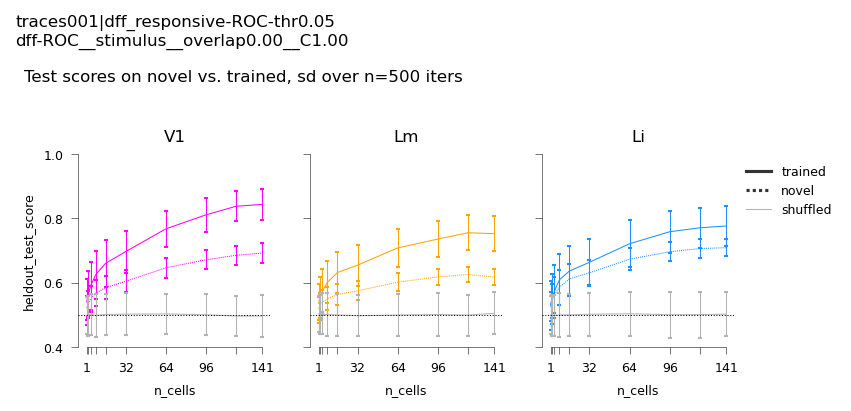

In [22]:
lw=0.5

plotd = mean_df[mean_df['n_cells']<=max_ncells].copy()
plotd['novel_labels'] = None
plotd.loc[plotd['novel'], 'novel_labels'] = 'novel'
plotd.loc[~plotd['novel'], 'novel_labels'] = 'trained'
#cond_colors = {'novel': 'cornflowerblue', 'trained': [0.3]*3}
cond_styles = {'trained': '', 'novel': (1,1)}

%matplotlib inline
metric='heldout_test_score'
if analysis_type=='by_ncells':
    fig, axn = pl.subplots(1,3, figsize=(6., 3), dpi=150, sharex=True, sharey=True)
    for vi, (va, df_) in enumerate(plotd.groupby('visual_area')):
        ai = visual_areas.index(va)
        ax=axn[ai]; ax.set_title(va);
        sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='data'], ax=ax,
                style='novel_labels', dashes=cond_styles, ci='sd', err_style='bars',
                    color=area_colors[va], lw=lw, 
                     err_kws=dict(linewidth=lw, capsize=1))
        sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='shuffled'],ax=ax,
                color=[0.7]*3, ci='sd', err_style='bars', label='shuffled', 
                    linestyle='-', lw=lw, 
                     err_kws=dict(linewidth=lw, capsize=1))
        ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
        ax.legend_.remove()
    axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

pl.subplots_adjust(left=0.07, right=0.8, bottom=0.25, top=0.7,
                      wspace=0.2)
for ax in axn:
    ax.set_yticks(np.linspace(0.4, 1, 4))
    ax.set_ylim([0.4,1])
    ax.set_xticks(sample_sizes)
    ax.set_box_aspect(1)
    ax.set_xticklabels([i if i in xlabels else '' for i in sample_sizes])
sns.despine(trim=True)

fig.text(0.01, 0.85, 'Test scores on novel vs. trained, sd over n=%i iters' % n_iters,
        fontsize=8)
pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))

figname = 'trained_v_novel_byncells_max-%i_%s%s' % (max_ncells, aggr_id, overlap_str)
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
pl.savefig(os.path.join(FIGDIR,  '%s.svg' % figname))

print(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [23]:
print(FIGDIR)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/generalization2


In [34]:
import scipy.stats as spstats
# spstats.ks_2samp
from itertools import combinations
import statsmodels.stats.multitest as smm
# smm.multipletests
import statsmodels.stats.multicomp as smc
import pingouin as pg

from scipy.stats import kruskal
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests


In [35]:
mean_df['condition'].unique()

array(['data', 'shuffled'], dtype=object)

In [36]:
mean_df.loc[mean_df['novel'], 'novel_labels'] = 'novel'
mean_df.loc[~mean_df['novel'], 'novel_labels'] = 'trained'

##### get N_CELLS condition where data > shuffled

In [37]:
statd = mean_df[(mean_df['n_cells']<=max_ncells)
               & (mean_df['novel_labels']=='trained')].copy()

In [42]:
va = 'V1'
cols = ['heldout_test_score', 'condition', 'n_cells']

currd = statd[statd['visual_area']==va][cols].copy()
currd.head()

,heldout_test_score,condition,n_cells
72000,0.550000,data,1
72002,0.483333,data,2
72004,0.533333,data,4
72006,0.716667,data,8
72008,0.683333,data,16


In [57]:
df = currd.copy()
# Initialize lists to store Kruskal-Wallis results
kruskal_results = []

# Perform Kruskal-Wallis test for each value of n_cells
for n_cells_value, group in df.groupby('n_cells'):
    condition_A_scores = group[group['condition'] == 'data']['heldout_test_score']
    condition_B_scores = group[group['condition'] == 'shuffled']['heldout_test_score']
    
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(condition_A_scores, condition_B_scores)
    kruskal_results.append({'n_cells': n_cells_value, 'stat': stat, 'p_value': p_value})

# Convert Kruskal-Wallis results to DataFrame
kruskal_df = pd.DataFrame(kruskal_results)

# Apply multiple comparisons correction (e.g., FDR or Bonferroni)
_, p_adjusted, _, _ = multipletests(kruskal_df['p_value'], method='fdr_bh')  # Change to 'bonferroni' for Bonferroni correction
kruskal_df['p_adjusted'] = p_adjusted

# Print Kruskal-Wallis test results with adjusted p-values
print(kruskal_df)

   n_cells         stat        p_value     p_adjusted
0        1   181.247234   2.588831e-41   2.588831e-41
1        2   387.927145   2.339609e-86   2.599566e-86
2        4   584.331754  4.283926e-129  5.354908e-129
3        8   951.655226  5.793464e-209  9.655774e-209
4       16  1205.310138  4.278190e-264  8.556379e-264
5       32  1391.557025  1.435851e-304  3.589627e-304
6       64  1496.786209   0.000000e+00   0.000000e+00
7       96  1500.210590   0.000000e+00   0.000000e+00
8      120  1501.460110   0.000000e+00   0.000000e+00
9      141   750.429804  3.235540e-165  4.622200e-165


In [58]:

# Filter for significant results (adjusted p-value < 0.05)
significant_kruskal = kruskal_df[kruskal_df['p_adjusted'] < 0.05]

# Print Kruskal-Wallis test results with adjusted p-values
print("Kruskal-Wallis Test Results:")
print(kruskal_df)

# Perform Dunn’s post-hoc test for significant Kruskal-Wallis results only
posthoc_results = {}

for n_cells_value in significant_kruskal['n_cells']:
    # Filter data for current n_cells value
    subset = df[df['n_cells'] == n_cells_value]
    
    # Perform Dunn's post-hoc test for condition A vs. condition B
    dunn_result = sp.posthoc_dunn(subset, val_col='heldout_test_score', group_col='condition', p_adjust='bonferroni')
    
    # Store the post-hoc result
    posthoc_results[n_cells_value] = dunn_result

# Print post-hoc results for significant n_cells values
print("\nPost-hoc Dunn's Test Results (for significant n_cells):")
for n_cells_value, result in posthoc_results.items():
    print(f"n_cells = {n_cells_value}")
    print(result)
    print()

Kruskal-Wallis Test Results:
   n_cells         stat        p_value     p_adjusted
0        1   181.247234   2.588831e-41   2.588831e-41
1        2   387.927145   2.339609e-86   2.599566e-86
2        4   584.331754  4.283926e-129  5.354908e-129
3        8   951.655226  5.793464e-209  9.655774e-209
4       16  1205.310138  4.278190e-264  8.556379e-264
5       32  1391.557025  1.435851e-304  3.589627e-304
6       64  1496.786209   0.000000e+00   0.000000e+00
7       96  1500.210590   0.000000e+00   0.000000e+00
8      120  1501.460110   0.000000e+00   0.000000e+00
9      141   750.429804  3.235540e-165  4.622200e-165

Post-hoc Dunn's Test Results (for significant n_cells):
n_cells = 1
                  data      shuffled
data      1.000000e+00  2.588831e-41
shuffled  2.588831e-41  1.000000e+00

n_cells = 2
                  data      shuffled
data      1.000000e+00  2.339609e-86
shuffled  2.339609e-86  1.000000e+00

n_cells = 4
                   data       shuffled
data       1.000000e+

In [51]:
dunn_results = sp.posthoc_dunn(df, 
                val_col='heldout_test_score', group_col='condition', p_adjust='bonferroni')
dunn_results

,data,shuffled
data,1.0,0.0
shuffled,0.0,1.0


In [56]:
df

,score,condition,n_cells
0,Ellipsis,Ellipsis,Ellipsis


In [60]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

df = currd.copy()

# Perform Two-Way ANOVA
# Using the formula: score ~ condition * n_cells
model = ols('heldout_test_score ~ C(condition) * C(n_cells)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 sum of squares (commonly used for interaction terms)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                             sum_sq       df             F  PR(>F)
C(condition)             163.568741      1.0  39775.460672     0.0
C(n_cells)                53.695737      9.0   1450.815571     0.0
C(condition):C(n_cells)   53.852633      9.0   1455.054780     0.0
Residual                  78.051508  18980.0           NaN     NaN


In [65]:
# Post-Hoc Tukey HSD test for pairwise comparisons if the interaction or main effects are significant
# If the ANOVA shows a significant effect, perform pairwise Tukey HSD tests
if anova_table['PR(>F)'][0] < 0.05 or anova_table['PR(>F)'][1] < 0.05 or anova_table['PR(>F)'][2] < 0.05:
    tukey = pairwise_tukeyhsd(df['heldout_test_score'], df['condition'].astype(str) + df['n_cells'].astype(str))
    print("\nTukey's HSD Post-hoc Test Results:")
    print(tukey.summary())

# Multiple comparisons correction for Tukey HSD results
# Extract p-values from Tukey's HSD result and apply correction (FDR or Bonferroni)
p_values = tukey.pvalues
_, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')  # Use 'bonferroni' for Bonferroni correction
print("\nAdjusted p-values after correction:")
print(p_adjusted)


Tukey's HSD Post-hoc Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
      data1     data120   0.2972    0.0  0.2871  0.3074   True
      data1     data141    0.303    0.0  0.2905  0.3154   True
      data1      data16   0.1202    0.0    0.11  0.1303   True
      data1       data2   0.0237    0.0  0.0135  0.0339   True
      data1      data32   0.1565    0.0  0.1463  0.1666   True
      data1       data4   0.0494    0.0  0.0392  0.0596   True
      data1      data64   0.2271    0.0  0.2169  0.2372   True
      data1       data8   0.0841    0.0   0.074  0.0943   True
      data1      data96   0.2706    0.0  0.2604  0.2807   True
      data1   shuffled1  -0.0415    0.0 -0.0517 -0.0314   True
      data1 shuffled120  -0.0435    0.0 -0.0537 -0.0333   True
      data1 shuffled141  -0.0436    0.0 -0.0561 -0.0312   True
      data1  shuffl

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


##### For each N_CELLS, where data>shuffled, compare novel vs. trained

In [102]:
# Two-Way ANOVA
va='V1'
cols = ['heldout_test_score', 'novel_labels', 'n_cells']
currd = statd[statd['visual_area']==va][cols].copy()
anova_results = pg.anova(data=currd, dv='heldout_test_score', 
                    between=['novel_labels', 'n_cells'], detailed=True)
print(anova_results)

# Post-hoc tests (Tukey HSD)
# Use Tukey's HSD for pairwise comparisons across levels of 'N' and 'condition'
posthoc = smc.pairwise_tukeyhsd(currd['heldout_test_score'], 
                                currd['novel_labels'] + "_" + currd['n_cells'].astype(str))
print(posthoc.summary())

KeyError: "['condition'] not in index"

#### try with KS

In [100]:
# Initialize lists to store results
ks_results = []

# Perform KS test for each value of N
for N_value, group in currd.groupby('n_cells'):
    a_scores = group[group['novel_labels'] == 'trained']['heldout_test_score']
    b_scores = group[group['novel_labels'] == 'novel']['heldout_test_score']
    stat, p = spstats.ks_2samp(a_scores, b_scores)  # KS test
    ks_results.append({'N': N_value, 'stat': stat, 'p': p})

# Convert results to DataFrame
ks_results = pd.DataFrame(ks_results)

# Apply Multiple Comparisons Correction
# Use FDR or Bonferroni correction
_, p_adjusted, _, _ = smm.multipletests(ks_results['p'], method='fdr_bh')
ks_results['p_adjusted'] = p_adjusted

print(ks_results)

     N   stat              p     p_adjusted
0    1  0.299   7.847683e-40   7.847683e-40
1    2  0.343   1.519382e-52   1.688202e-52
2    4  0.368   1.299099e-60   1.623874e-60
3    8  0.479  3.178501e-104  4.540715e-104
4   16  0.595  9.403763e-165  1.567294e-164
5   32  0.712  2.460556e-244  4.921112e-244
6   64  0.867   0.000000e+00   0.000000e+00
7   96  0.929   0.000000e+00   0.000000e+00
8  120  0.961   0.000000e+00   0.000000e+00
9  141  0.954  2.218188e-253  5.545471e-253


In [38]:
# plotd[(plotd.condition=='data')
#       & (plotd['novel_labels']=='trained')].groupby(['visual_area', 'n_cells'])['heldout_test_score'].min()

In [39]:
plotd = mean_df[(mean_df['n_cells']==max_ncells)
               & (mean_df['condition']=='data')].copy()
plotd['novel_labels'] = None
plotd.loc[plotd['novel'], 'novel_labels'] = 'novel'
plotd.loc[~plotd['novel'], 'novel_labels'] = 'trained'

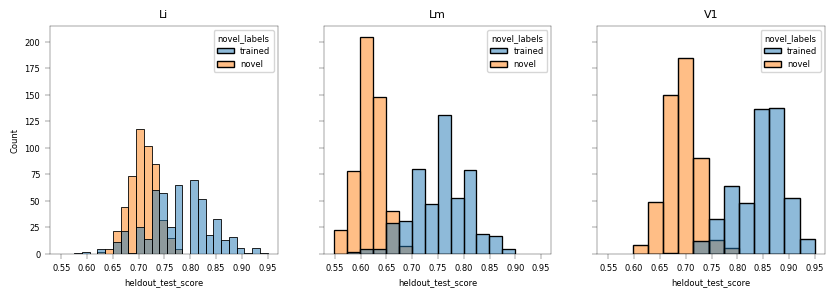

In [40]:
fig, axn =pl.subplots(1, 3, sharex=True, sharey=True, figsize=(10,4))
i = 0
for va, d in plotd.groupby('visual_area'):
    ax=axn[i]
    sns.histplot(data=d, x='heldout_test_score', ax=ax, hue='novel_labels')
    ax.set_title(va)
    ax.set_box_aspect(1)
    i+=1

In [44]:
compare_df = plotd[['visual_area', 'heldout_test_score', 'novel_labels']]
#perform Kolmogorov-Smirnov test
results = {}
groups = ['V1', 'Lm', 'Li']

for va, d_ in compare_df.groupby('visual_area'):
    print("VISUAL AREA: {} -------------------------------------".format(va))
    ks_stat, p_value = spstats.ks_2samp(
                d_[d_['novel_labels']=='trained']['heldout_test_score'].sample(100, replace=True),
                d_[d_['novel_labels']=='novel']['heldout_test_score'].sample(100, replace=True))
    results["trained vs novel"] = (ks_stat, p_value)

    # Apply Bonferroni correction
    adjusted_p_values = smm.multipletests([r[1] for r in results.values()], method='bonferroni')[1]

    # Print results
    for (comparison, (ks_stat, p)), adj_p in zip(results.items(), adjusted_p_values):
        print(f"{comparison}: KS-stat = {ks_stat:.2f}, p = {p:.2e}, adjusted p = {adj_p:.2e}")

VISUAL AREA: Li -------------------------------------
trained vs novel: KS-stat = 0.72, p = 2.68e-25, adjusted p = 2.68e-25
VISUAL AREA: Lm -------------------------------------
trained vs novel: KS-stat = 0.96, p = 1.43e-51, adjusted p = 1.43e-51
VISUAL AREA: V1 -------------------------------------
trained vs novel: KS-stat = 0.97, p = 2.90e-53, adjusted p = 2.90e-53


In [45]:
aggr_id

'dff-ROC__stimulus__overlap0.00__C1.00'

In [46]:
curr_dst_dir

'/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002'

## Generalization score

In [47]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [48]:
# curr_ncells=128
metric = 'heldout_test_score'
pass_list=[]
for (va, nc), g in mean_df.groupby(['visual_area', 'n_cells']):
    traindf = g[~(g.novel)].sort_values(by='iteration')
    # Get values for all iterations at current NCELLS & COND (500 iters):
    ddf = traindf[traindf.condition=='data'][metric].reset_index(drop=True)
    ddf_s = traindf[traindf.condition=='shuffled'][metric].reset_index(drop=True)
    # Get indices were data > shuffled
    pass_ixs = ddf[ddf>ddf_s].index.to_numpy()
    pass_list.append(g[g.iteration.isin(pass_ixs)])

passdf = pd.concat(pass_list, axis=0)

In [49]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [50]:
metric='heldout_test_score'
curr_ncells = max_ncells
byiter_novel = dec.generalization_score_by_iter(mean_df, max_ncells=curr_ncells)

In [51]:
gen_df = byiter_novel[(byiter_novel['n_cells']==curr_ncells)].drop_duplicates()
gen_df.shape

(1500, 17)

/tmp/ipykernel_652283/1597914229.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='n_cells', y=generalization_metric, data=byiter_novel, ax=ax,


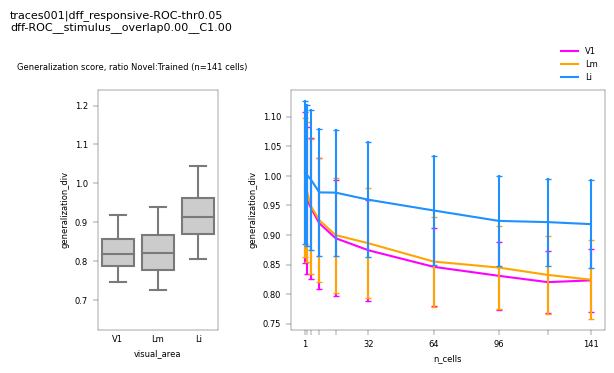

In [52]:
generalization_metric='generalization_div'

multi_comp_test='fdr_bh'
import matplotlib.gridspec as gridspec
fig = pl.figure(figsize=(7,4))
gs = gridspec.GridSpec(1,3) # figsize=(6,3))

ax=fig.add_subplot(gs[0])
sns.boxplot(x='visual_area', y=generalization_metric, 
            data=gen_df, ax=ax, whis=(5, 95), fliersize=0,
            order=visual_areas, color=[0.8]*3)
# ax.set_yticks(np.linspace(0.5, 1, 3))
# ax.set_yticks(np.linspace(0.6, 1.2, 4))
# ax.set_ylim([0.6,1.2])
ax.tick_params(which='both', axis='x', size=0)

ax=fig.add_subplot(gs[1:])
sns.lineplot(x='n_cells', y=generalization_metric, data=byiter_novel, ax=ax, 
             hue='visual_area', ci='sd',err_style='bars', err_kws={'capsize':2},
             palette=area_colors, hue_order=visual_areas)

#ax.set_yticks(np.linspace(0.6, 1.2, 4))
#ax.set_ylim([0.6,1.2])
ax.set_xticks(sample_sizes)
ax.set_xticklabels([i if i in xlabels else '' for i in sample_sizes])
fig.text(0.01, 0.85, 'Generalization score, ratio Novel:Trained (n=%i cells)' \
         % curr_ncells)

# legend
ax.legend(bbox_to_anchor=(1., 1.), loc='lower right', frameon=False,
          title='', markerscale=0.5, fontsize=6)
pl.subplots_adjust(wspace=0.6, right=0.85, top=0.8, bottom=0.2)
pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/generalization2


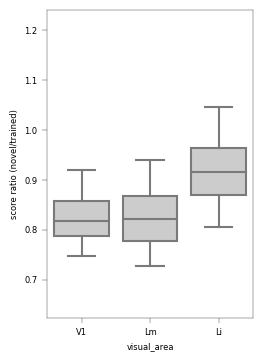

In [53]:
# boxplot: 
# whis=(5, 95) 
# If scalar, whiskers are drawn to the farthest datapoint within whis * IQR from the nearest hinge. 
# If a tuple, it is interpreted as percentiles that whiskers represent.
# fliers: outliers, 1.5*IQR

fig, ax =pl.subplots()
sns.boxplot(x='visual_area', y=generalization_metric, 
            data=gen_df, ax=ax, whis=(5, 95), 
            fliersize=0, flierprops={"marker": "."},
            order=visual_areas, color=[0.8]*3)
ax.set_box_aspect(1.5)
ax.set_ylabel("score ratio (novel/trained)")

figname = 'generalization_{}'.format(generalization_metric)
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
pl.savefig(os.path.join(FIGDIR,  '%s.svg' % figname))
print(FIGDIR)

In [54]:
import scipy.stats as spstats
from itertools import combinations
import statsmodels.stats.multitest as smm

#### kolmogorov-smirnov test

In [55]:
gen_vals = gen_df[['visual_area', generalization_metric]].copy()
#perform Kolmogorov-Smirnov test
results = {}
groups = ['V1', 'Lm', 'Li']

for group1, group2 in combinations(groups, 2):
    ks_stat, p_value = spstats.ks_2samp(
                gen_vals[gen_vals['visual_area']==group1][generalization_metric], 
                gen_vals[gen_vals['visual_area']==group2][generalization_metric])
    results[f"{group1} vs {group2}"] = (ks_stat, p_value)

# Apply Bonferroni correction
adjusted_p_values = smm.multipletests([r[1] for r in results.values()], method='bonferroni')[1]

# Print results
true_ks = []
i = 0
for (comparison, (ks_stat, p)), adj_p in zip(results.items(), adjusted_p_values):
    print(f"{comparison}: KS-stat = {ks_stat:.2f}, p = {p:.2e}, adjusted p = {adj_p:.2e}")
    
    ks = pd.DataFrame({'comparison': comparison,
                         'ks_stat': ks_stat,
                         'p': p,
                         'adjusted_p': adj_p}, index=[i])
    i+=1
    true_ks.append(ks)
true_ks = pd.concat(true_ks)

V1 vs Lm: KS-stat = 0.08, p = 6.93e-02, adjusted p = 2.08e-01
V1 vs Li: KS-stat = 0.56, p = 1.53e-72, adjusted p = 4.60e-72
Lm vs Li: KS-stat = 0.52, p = 1.48e-61, adjusted p = 4.43e-61


In [56]:
true_ks

,comparison,ks_stat,p,adjusted_p
0,V1 vs Lm,0.082,6.930077e-02,2.079023e-01
1,V1 vs Li,0.560,1.534263e-72,4.602788e-72
2,Lm vs Li,0.518,1.476409e-61,4.429227e-61


In [71]:
gen_shuff = gen_df[['visual_area', generalization_metric]].copy()
gen_shuff['visual_area'] = gen_shuff['visual_area'].sample(frac=1).values
gen_shuff

,visual_area,generalization_div
27,Li,0.935484
55,V1,0.818885
83,V1,0.938088
111,Lm,1.007328
139,Lm,1.000802
...,...,...
86877,Li,0.896552
86907,V1,0.819779
86937,Lm,0.727066
86967,V1,0.866897


#### bootstrap the KS?

In [83]:
gen_shuff = gen_df[['visual_area', generalization_metric]].copy()
i=0
k_ = []
    
for x in range(1000):
    #perform Kolmogorov-Smirnov test
    results = {}
    groups = ['V1', 'Lm', 'Li']

    gen_shuff['visual_area'] = gen_shuff['visual_area'].sample(frac=1, random_state=x).values

    for group1, group2 in combinations(groups, 2):
        ks_stat, p_value = spstats.ks_2samp(
                    gen_shuff[gen_shuff['visual_area']==group1][generalization_metric], 
                    gen_shuff[gen_shuff['visual_area']==group2][generalization_metric])
        results[f"{group1} vs {group2}"] = (ks_stat, p_value)

    # Apply Bonferroni correction
    adjusted_p_values = smm.multipletests([r[1] for r in results.values()], method='bonferroni')[1]

    # Print results
    for (comparison, (ks_stat, p)), adj_p in zip(results.items(), adjusted_p_values):
        #print(f"{comparison}: KS-stat = {ks_stat:.2f}, p = {p:.2e}, adjusted p = {adj_p:.2e}")

        ks = pd.DataFrame({'comparison': comparison,
                     'ks_stat': ks_stat,
                     'p': p,
                     'adjusted_p': adj_p}, index=[i])
        i+=1
        k_.append(ks)
shuff_ks = pd.concat(k_).reset_index(drop=True)

Lm vs Li: 0.0
V1 vs Li: 0.0
V1 vs Lm: 0.183


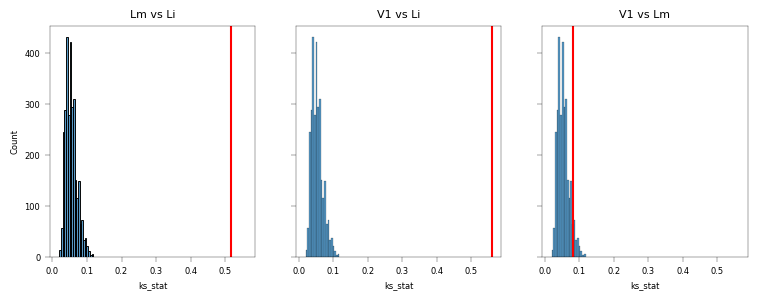

In [85]:
fig, axn = pl.subplots(1,3, figsize=(9,3), sharex=True, sharey=True)

i=0
for comparison, ks_ in shuff_ks.groupby('comparison'):
    ax=axn[i]
    ax.set_title(comparison)
    sns.histplot(data=shuff_ks, x='ks_stat', ax=ax, bins=20)
    tru = float(true_ks[true_ks['comparison']==comparison]['ks_stat'])
    ax.axvline(x=tru, color='r')
    n_above = len(shuff_ks[shuff_ks['ks_stat'] > tru])
    print("{}: {}".format(comparison, n_above/1000))
    i+=1

#### kruskal wallis?

In [384]:
gen_vals = gen_df[['visual_area', generalization_metric]]
print("Kruskal Wallis:")
print(pg.kruskal(data=gen_vals, dv=generalization_metric, between='visual_area'))
# Perform Dunn's post-hoc test with Bonferroni correction
posthoc_results = sp.posthoc_dunn(gen_vals, val_col=generalization_metric, 
                                  group_col='visual_area', p_adjust='bonferroni')
print(posthoc_results)

Kruskal Wallis:
              Source  ddof1           H          p-unc
Kruskal  visual_area      2  471.897978  3.377972e-103
              Li            Lm            V1
Li  1.000000e+00  3.060404e-76  1.194649e-80
Lm  3.060404e-76  1.000000e+00  1.000000e+00
V1  1.194649e-80  1.000000e+00  1.000000e+00


In [385]:
gen_df.groupby('visual_area')[generalization_metric].describe()

,count,mean,std,min,25%,50%,75%,max
visual_area,,,,,,,,
Li,500.0,0.918270,0.074720,0.731302,0.869102,0.914677,0.963158,1.212815
Lm,500.0,0.824446,0.066186,0.651525,0.777748,0.820366,0.866995,1.086207
V1,500.0,0.823212,0.053671,0.696429,0.786552,0.817148,0.858076,1.026063


In [386]:
mean_gen = gen_df.groupby('visual_area').mean()
mean_gen

/tmp/ipykernel_87409/2934735547.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_gen = gen_df.groupby('visual_area').mean()


,iteration,n_cells,novel,heldout_test_score,C,randi,train_transform,test_transform,n_trials,randi_cells,intact,overlap_thr,generalization_norm,generalization_div,generalization_sub
visual_area,,,,,,,,,,,,,,,
Li,249.5,141.0,1.0,0.708589,1.0,5050.4572,30.0,30.0,46.24,5054.006,1.0,0.0,0.081730,0.918270,0.067477
Lm,249.5,141.0,1.0,0.617022,1.0,5012.5104,30.0,30.0,58.00,4832.296,1.0,0.0,0.175554,0.824446,0.135111
V1,249.5,141.0,1.0,0.692086,1.0,4989.2780,30.0,30.0,58.00,4809.996,1.0,0.0,0.176788,0.823212,0.150914


<IPython.core.display.Javascript object>


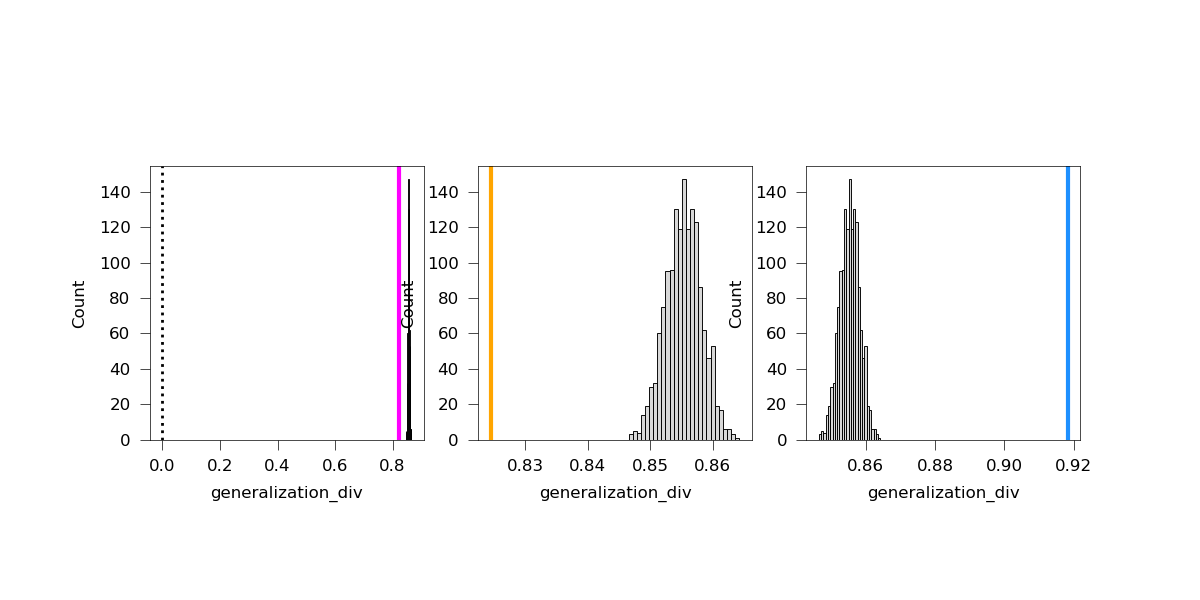

In [408]:
shuff_df = gen_df.copy()
m_list = []
for i in range(500):
    shuff_df['visual_area'] = shuff_df['visual_area'].sample(frac=1, replace=False).values
    m_ = shuff_df.groupby('visual_area')[generalization_metric].mean().reset_index()
    m_list.append(m_)
gen_df_shuffled = pd.concat(m_list)

fig, axn = pl.subplots(1, 3, figsize=(6,3))
for va, vg in gen_df_shuffled.groupby('visual_area'):
    ax=axn[visual_areas.index(va)]
    sns.histplot(x=generalization_metric, data=gen_df_shuffled, ax=ax,
                 color=[0.8]*3, cumulative=False, common_norm=False)
    true_score = mean_gen.loc[va][generalization_metric]
    ax.axvline(x=true_score, color=area_colors[va])
    ax.set_box_aspect(1)
    
#     shuff_dist = np.array(sorted(vg[generalization_metric].values))
#     n_extreme = len(np.where(shuff_dist>=true_score)[0])
#     pv = n_extreme/len(shuff_dist)
#     if pv<0.05:
#         sig_str='**' if pv<0.01 else '*'
#     else:
#         sig_str='n.s.'
#     if vi==2:
#         legh = pplot.custom_legend_markers(colors=['r', [0.4]*3], 
#                                     labels=['true diffs', 'shuffled'], 
#                                     use_patch=True, alpha=0.5)
#         ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
#     #ax.axvline(x=true_diff, ls='-', c='r', lw=2)
#     ax.set_title('%s (%s, p=%.2f)' % (va, sig_str, pv),
#                  loc='left', fontsize=7)
    

## Shuffle trained and novel labels for iterdf (visual_area label intact)

In [39]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [73]:
# curr_ncells = 120
data_ = iterdf[(iterdf.n_cells==curr_ncells) & (iterdf.condition=='data')].copy()
diffs = dec.permutation_test_trained_v_novel(data_)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2583: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_iters = iterdf.groupby(grouper).mean().reset_index()
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2583: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_iters = iterdf.groupby(grouper).mean().reset_index()


<IPython.core.display.Javascript object>


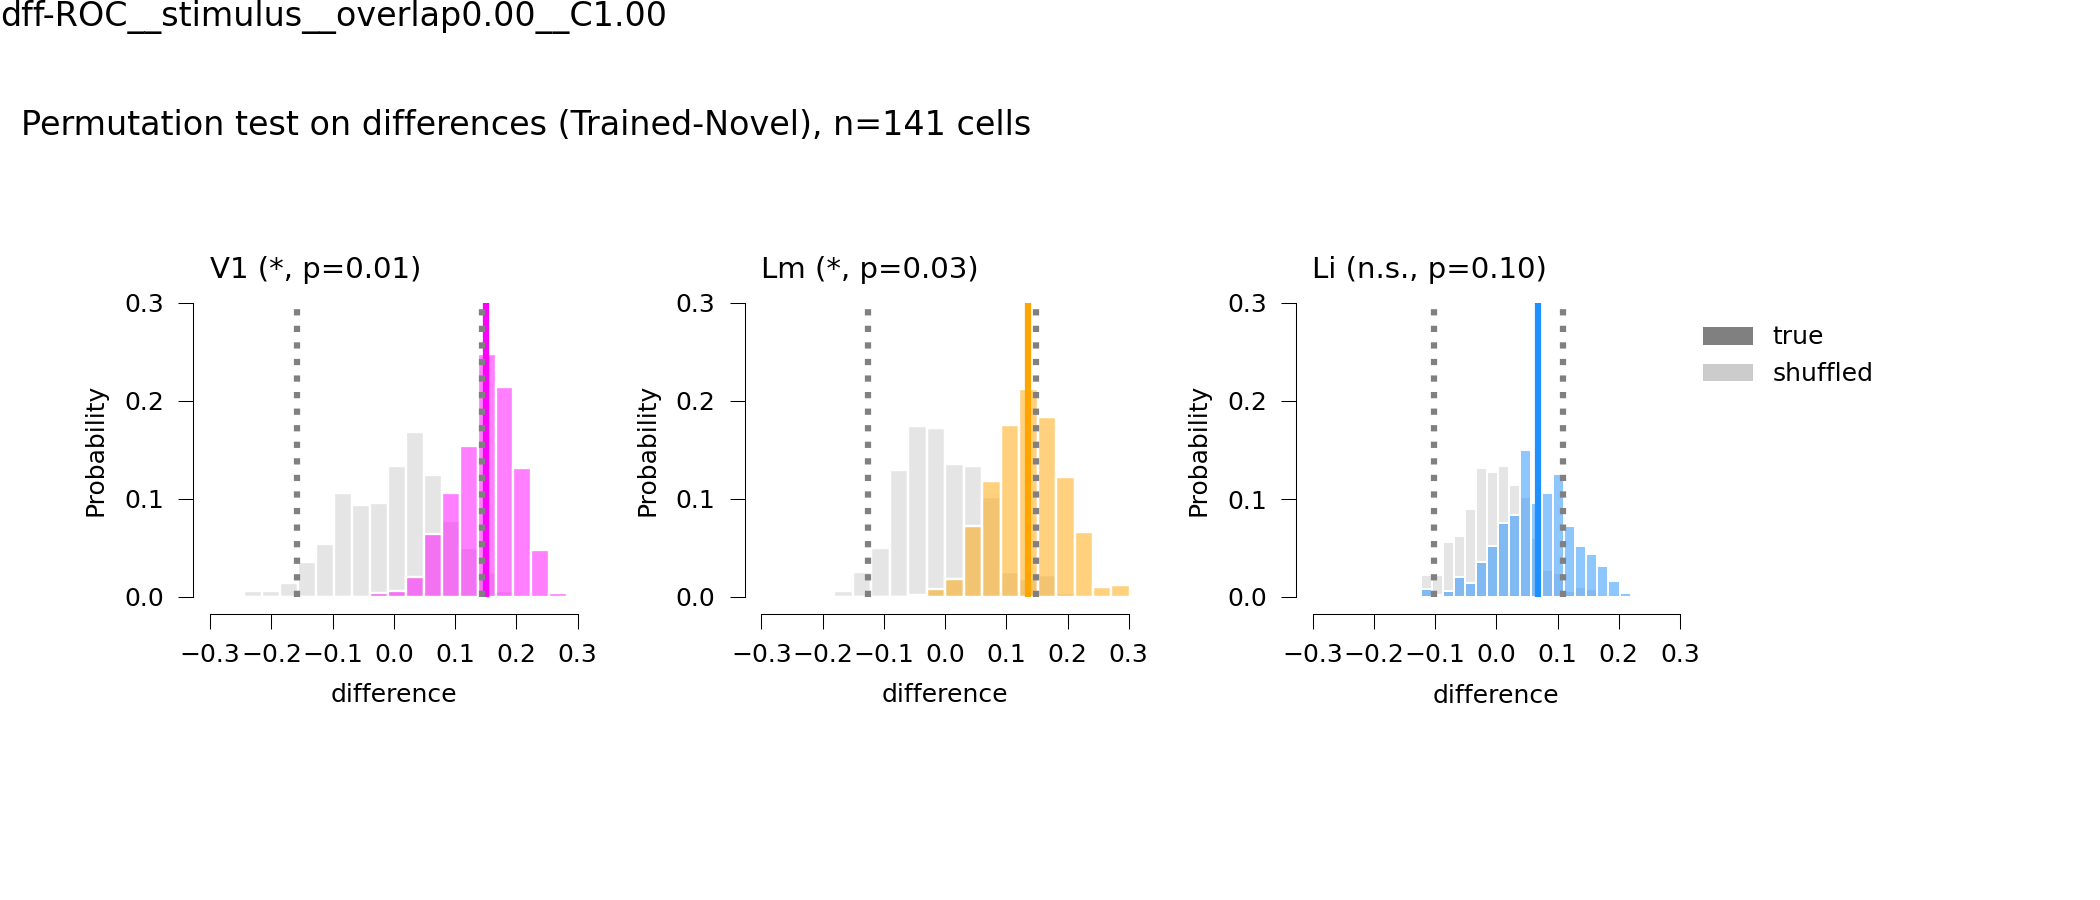

|    | visual_area   |   p-val |
|---:|:--------------|--------:|
|  0 | Li            |   0.1   |
|  1 | Lm            |   0.032 |
|  2 | V1            |   0.014 |
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002 permutation_test_trained-v-novel-diffs


In [74]:
shuff_color=[0.8]*3
s_=[]
fig, axn = pl.subplots(1,3, figsize=(7, 3), sharex=True, sharey=False, dpi=150)
for vi, (va, vg) in enumerate(diffs.groupby('visual_area')):
    ax=axn[visual_areas.index(va)]
    sns.histplot(x='difference', hue='trained_v_novel', data=vg, ax=ax, alpha=0.5,
                palette={'shuffled': shuff_color, 'true': area_colors[va]},
                 stat='probability', legend=True,edgecolor='w', common_norm=False)
    meas_mean = vg[vg.trained_v_novel=='true']['difference'].mean()
    ax.axvline(x=meas_mean, color=area_colors[va])
    shuff_dist = sorted(vg[vg.trained_v_novel=='shuffled']['difference'].values)
    n_below = len(np.where(shuff_dist>=meas_mean)[0])
    pv = n_below/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    ax.set_title('%s (%s, p=%.2f)' % (va, sig_str, pv), loc='left', fontsize=7)
    stat_ = pd.Series({'visual_area': va, 'p-val': pv})
    s_.append(stat_)
    c_lo, c_hi = hutils.get_empirical_ci(shuff_dist)
    ax.axvline(x=c_lo, color=[0.5]*3, ls=':')
    ax.axvline(x=c_hi, color=[0.5]*3, ls=':')
    
    if va=='Li':
        leg_h = pplot.custom_legend_markers(colors=[[0.5]*3, shuff_color],
                                           labels=['true', 'shuffled'], 
                                           use_patch=True)
        ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False,
                 title=None)
    else:
        ax.legend_.remove()
    #ax.set_ylim([0, 0.12])
    ax.set_xlim([-0.3, 0.3])
    ax.set_xticks(np.linspace(-0.3, 0.3, 7))
    ax.set_yticks(np.linspace(0, 0.3, 4))
    ax.set_yticks(np.linspace(0, 0.3, 4))
    ax.set_box_aspect(0.8)
sns.despine(trim=True, offset=4)
statdf = pd.concat(s_, axis=1).T
print(statdf.to_markdown())

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.25, top=0.75,
                  wspace=0.5)

fig.text(0.01, 0.85,\
         "Permutation test on differences (Trained-Novel), n=%i cells" \
         % max_ncells, fontsize=8)

pplot.label_figure(fig, aggr_id)
figname = 'permutation_test_trained-v-novel-diffs'
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
print(curr_dst_dir, figname)

In [75]:
curr_ncells

141

In [76]:
diffs[diffs.trained_v_novel=='true'].groupby(['visual_area'])['difference'].describe()

,count,mean,std,min,25%,50%,75%,max
visual_area,,,,,,,,
Li,500.0,0.067477,0.060901,-0.122368,0.027632,0.065948,0.106579,0.255263
Lm,500.0,0.135111,0.057177,-0.050287,0.095402,0.135920,0.173922,0.302011
V1,500.0,0.150914,0.050583,-0.018678,0.118463,0.155460,0.185632,0.283333


<IPython.core.display.Javascript object>


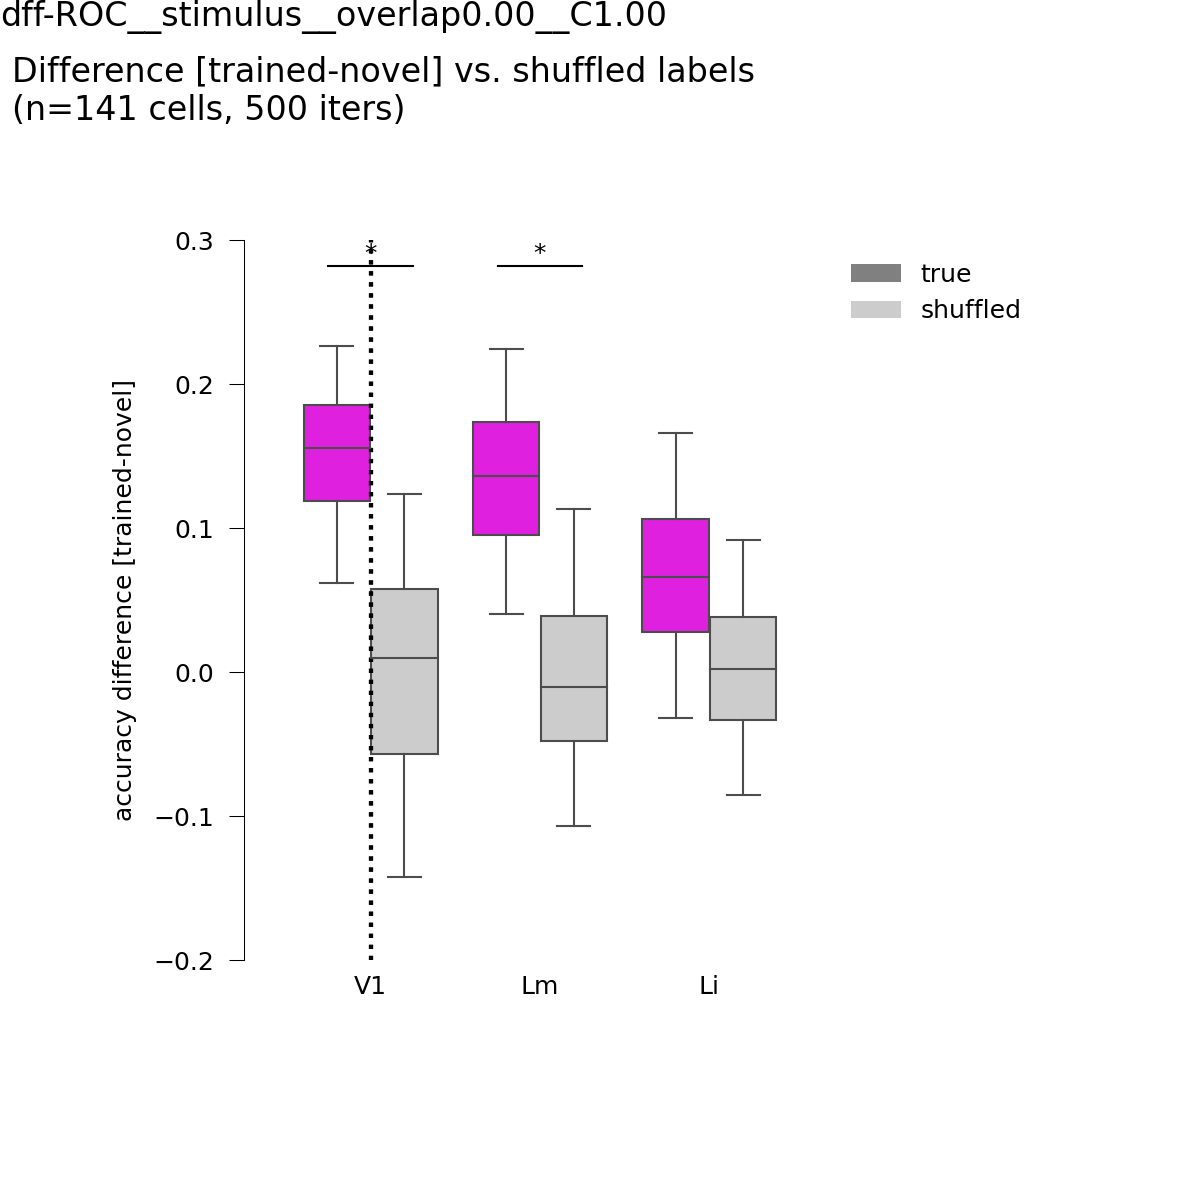

  visual_area  p-val
1          Lm  0.032
  visual_area  p-val
2          V1  0.014
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002 permutation_test_diff_boxplot


/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/plotting.py:430: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for v, vstats in pstats[pstats[stat]<thr].groupby(['visual_area']):


In [77]:
shuff_color=[0.8]*3
fig, ax = pl.subplots(figsize=(4,4), dpi=150)
sns.boxplot(x='visual_area', y='difference', data=diffs, ax=ax,
            order=visual_areas, hue='trained_v_novel', 
            palette={'shuffled': shuff_color, 'true': area_colors[va]},
           fliersize=0, linewidth=0.5, whis=[5, 95])
pl.subplots_adjust(bottom=0.2, right=0.8)
ax.set_box_aspect(1.25)
ax.set_ylim([-0.2, 0.3])
sns.despine(bottom=True, offset=2)
ax.tick_params(which='both', axis='x', size=0)
ax.set_xlabel('')
ax.set_ylabel('accuracy difference [trained-novel]')
for bi, va in zip(np.arange(0, len(ax.artists))[0::2], visual_areas):
    bx = ax.artists[bi]
    bx.set_facecolor(area_colors[va])
# stats
pplot.annotate_sig_on_paired_plot(ax, diffs, statdf, 'difference', 
                            offset=-0.02, h=0.00, lw=0.5, stat='p-val')
# legend    
leg_h = pplot.custom_legend_markers(colors=[[0.5]*3, shuff_color],
                                   labels=['true', 'shuffled'], use_patch=True)
ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False,
         title=None)

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.8)
fig.text(0.01, 0.9, \
    'Difference [trained-novel] vs. shuffled labels\n(n=%i cells, %i iters)' % (curr_ncells, n_iters),\
         fontsize=8)

pplot.label_figure(fig, aggr_id)
figname = 'permutation_test_diff_boxplot'
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
print(curr_dst_dir, figname)

#### Calculate "generalization score"

In [45]:
# def calculate_difference_scores(byiter_data):
#     cols = ['visual_area', 'n_cells', 'iteration'] #, 'train_transform', 'test_transform']
#     diffdf = byiter_data[cols].copy().reset_index(drop=True).drop_duplicates()
#     diffdf = diffdf.sort_values(by=['iteration', 'visual_area'])

#     byiter_data = byiter_data.sort_values(by=['iteration', 'visual_area'])
#     true_diffs = byiter_data[(~byiter_data.novel)]['heldout_test_score'].values\
#                 - byiter_data[(byiter_data.novel)]['heldout_test_score'].values
#     diffdf['difference'] = true_diffs
    
#     return diffdf

In [46]:
itershuff.n_cells.unique()

array([  4,  94,  73,   2,  16,  96,   1, 120,  64, 128,  32, 141,   8])

In [78]:
print(curr_ncells)
itershuff[(itershuff.n_cells==curr_ncells) & (itershuff.condition=='data')]

141


,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
300000,0.003636,0.000370,0.526667,1.0,0.666667,1.0,1653,data,10.0,10.0,58,False,375,141,5303,Li,aggregate,True,intact,0.0
300002,0.003636,0.000370,0.526667,1.0,0.586207,1.0,1653,data,10.0,20.0,58,True,375,141,5303,Li,aggregate,True,intact,0.0
300003,0.003636,0.000370,0.526667,1.0,0.706897,1.0,1653,data,10.0,30.0,58,True,375,141,5303,Li,aggregate,True,intact,0.0
300004,0.003636,0.000370,0.526667,1.0,0.586207,1.0,1653,data,10.0,40.0,58,True,375,141,5303,Li,aggregate,True,intact,0.0
300005,0.003636,0.000370,0.526667,1.0,0.586207,1.0,1653,data,10.0,50.0,58,True,375,141,5303,Li,aggregate,True,intact,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704994,0.001057,0.000393,1.000000,1.0,1.000000,1.0,3570,data,50.0,50.0,58,False,374,141,2247,V1,aggregate,True,intact,0.0
704996,0.001057,0.000393,1.000000,1.0,0.517241,1.0,3570,data,50.0,10.0,58,True,374,141,2247,V1,aggregate,True,intact,0.0
704997,0.001057,0.000393,1.000000,1.0,0.568966,1.0,3570,data,50.0,20.0,58,True,374,141,2247,V1,aggregate,True,intact,0.0
704998,0.001057,0.000393,1.000000,1.0,0.689655,1.0,3570,data,50.0,30.0,58,True,374,141,2247,V1,aggregate,True,intact,0.0


In [80]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

(37500, 20)


/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2583: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_iters = iterdf.groupby(grouper).mean().reset_index()


<IPython.core.display.Javascript object>


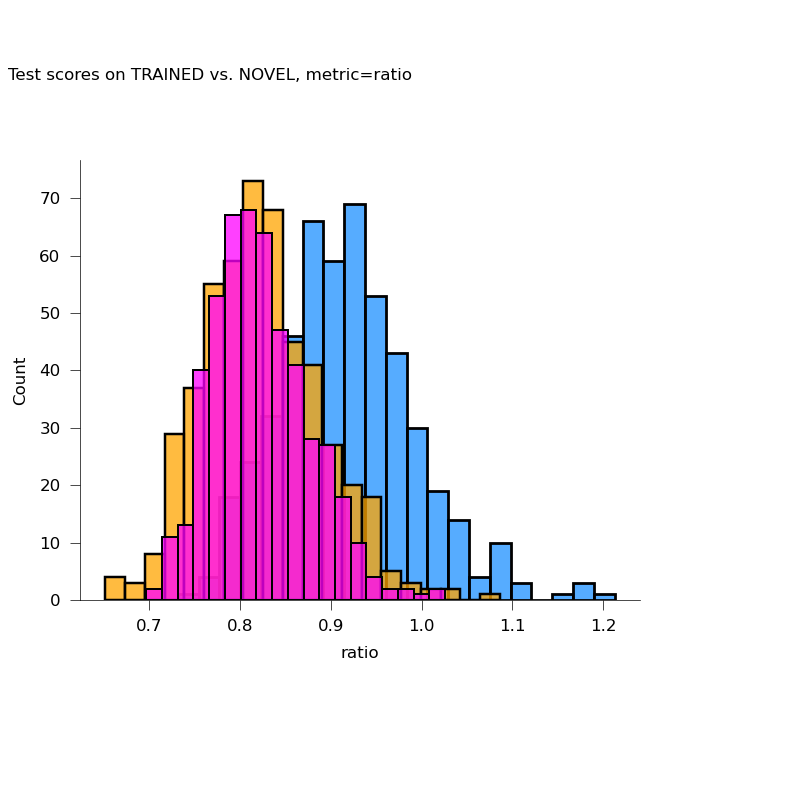

Text(0.01, 0.9, 'Test scores on TRAINED vs. NOVEL, metric=ratio')

In [354]:
# curr_ncells=94 #max_ncells #128
metric_name = 'ratio'
data_df = iterdf[(iterdf.n_cells==curr_ncells) & (iterdf.condition=='data')].copy()
print(data_df.shape)
data_scores = dec.average_within_iterations_by_ncells(data_df, 
                                analysis_type='by_ncells',
                                test_type='size_single',
                                grouper=['visual_area', 'condition', 'iteration'])
diff_scores = dec.calculate_difference_scores(data_scores,
                                              metric_name=metric_name
                                             )
fg = sns.FacetGrid(data=diff_scores, height=4, 
                  hue='visual_area', palette=area_colors)
fg.map(sns.histplot, metric_name)
ax.axvline(x=0, ls=':', c='k', lw=1)

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.25, top=0.8)
fg.fig.text(0.01, 0.9, 'Test scores on TRAINED vs. NOVEL, metric={}'.format(metric_name))

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2583: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_iters = iterdf.groupby(grouper).mean().reset_index()


<IPython.core.display.Javascript object>


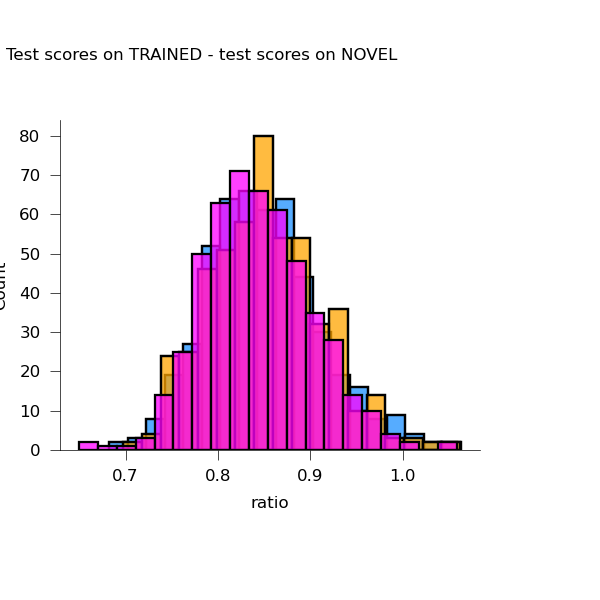

Text(0.01, 0.9, 'Test scores on TRAINED - test scores on NOVEL')

In [413]:

shuff_df = itershuff[(itershuff.n_cells==curr_ncells) & (itershuff.condition=='data')].copy()
shuff_scores = dec.average_within_iterations_by_ncells(shuff_df, 
                                analysis_type='by_ncells',
                                test_type='size_single',
                                grouper=['visual_area', 'condition', 'iteration'])
diff_scores_shuff = dec.calculate_difference_scores(shuff_scores,
                                            metric_name=metric_name)

fg = sns.FacetGrid(data=diff_scores_shuff, height=3, 
                  hue='visual_area', palette=area_colors)
fg.map(sns.histplot, metric_name)
ax.axvline(x=0, ls=':', c='k', lw=1)

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.25, top=0.8)
fg.fig.text(0.01, 0.9, 'Test scores on TRAINED - test scores on NOVEL')

In [416]:
import itertools

import statsmodels.stats.multitest as smulti

import pingouin as pg
import scipy.stats as spstats

In [417]:
diff_scores.shape, diff_scores_shuff.shape #.reload(pplot)

((1500, 4), (1500, 4))

In [418]:
diff_scores['condition'] = 'true'
diff_scores_shuff['condition'] = 'shuffled'
DIFFS = pd.concat([diff_scores, diff_scores_shuff], axis=0, ignore_index=True)
DIFFS.head()

,visual_area,n_cells,iteration,ratio,condition
0,Li,141,0,0.935484,true
1,Lm,141,0,0.739545,true
2,V1,141,0,0.778966,true
3,Li,141,1,0.818885,true
4,Lm,141,1,0.882759,true


In [419]:
v_combos = list(itertools.combinations(visual_areas, 2))
df_list=[]
for vi, (v1, v2) in enumerate(v_combos):
    # Original diff. distributions
    for shuffcond, diffs in DIFFS.groupby('condition'):
        curr_scores = diffs[diffs.visual_area.isin([v1, v2])].copy()
        v1_df = curr_scores[curr_scores.visual_area==v1]\
                [['iteration', 'visual_area', metric_name]].copy()
        v2_df = curr_scores[curr_scores.visual_area==v2]\
                [['iteration', 'visual_area', metric_name]].copy()
        diffs_ = pd.merge(v1_df, v2_df, on=['iteration'], how='outer',
                          suffixes=('_%s' % v1, '_%s' % v2))
        diffs_[metric_name] = diffs_['%s_%s' % (metric_name, v1)] \
                                - diffs_['%s_%s' % (metric_name, v2)]
        true_diff = diffs_[metric_name].mean()
        diffs_['condition'] = shuffcond
        diffs_['area_pair'] = '%s_%s' % (v1, v2)
        df_list.append(diffs_[['area_pair', 'iteration', 'condition', metric_name]])

diff_v_shuff = pd.concat(df_list, axis=0, ignore_index=True)
diff_v_shuff.shape

(3000, 4)

In [426]:
DIFFS

,visual_area,n_cells,iteration,ratio,condition
0,Li,141,0,0.935484,true
1,Lm,141,0,0.739545,true
2,V1,141,0,0.778966,true
3,Li,141,1,0.818885,true
4,Lm,141,1,0.882759,true
...,...,...,...,...,...
2995,Lm,141,498,0.798030,shuffled
2996,V1,141,498,0.771883,shuffled
2997,Li,141,499,0.756705,shuffled
2998,Lm,141,499,0.791171,shuffled


<IPython.core.display.Javascript object>


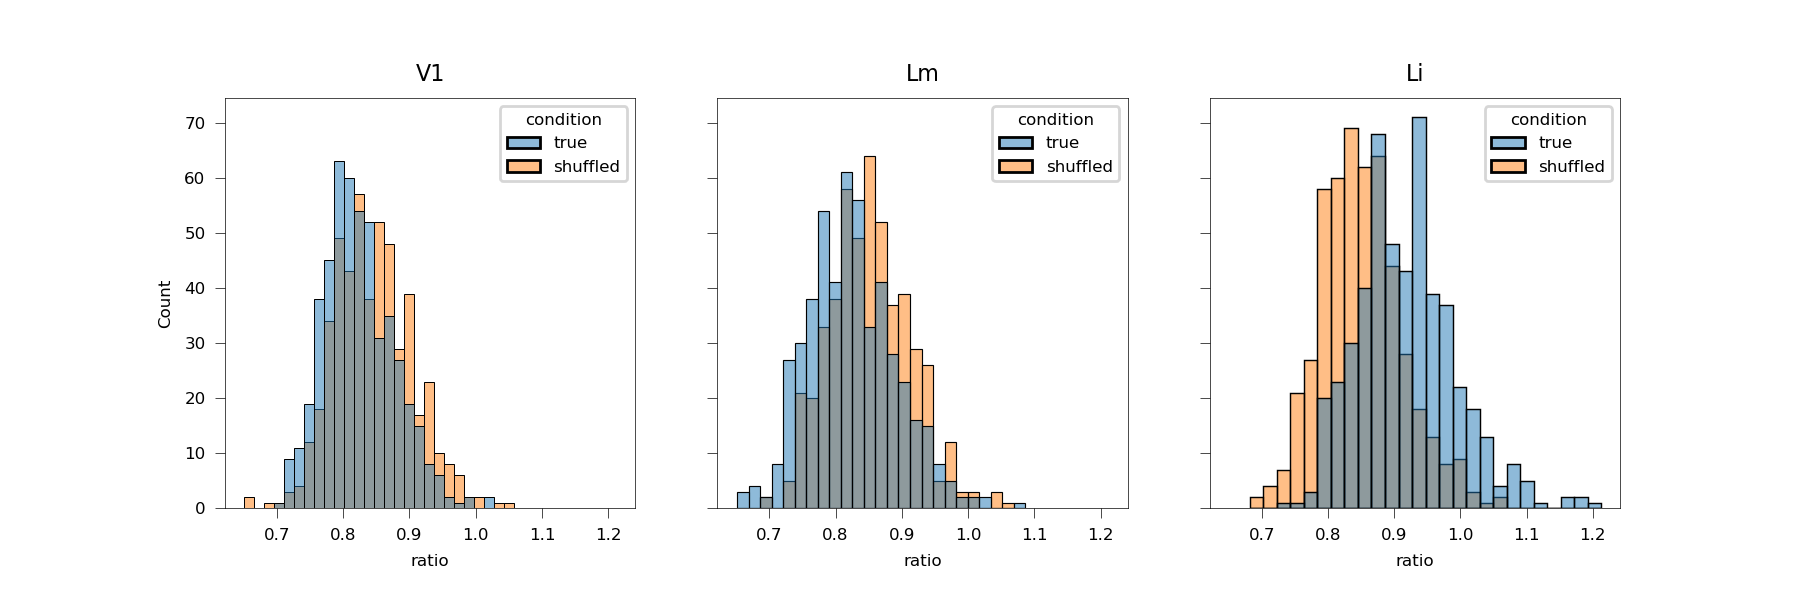

In [429]:
fig, axn = pl.subplots(1, 3, sharex=True, sharey=True, figsize=(9,3))
for va, vd in DIFFS.groupby('visual_area'):
    ax=axn[visual_areas.index(va)]
    sns.histplot(data=vd, x=metric_name, hue='condition', ax=ax)
    ax.set_title(va)
    ax.set_box_aspect(1)

<IPython.core.display.Javascript object>


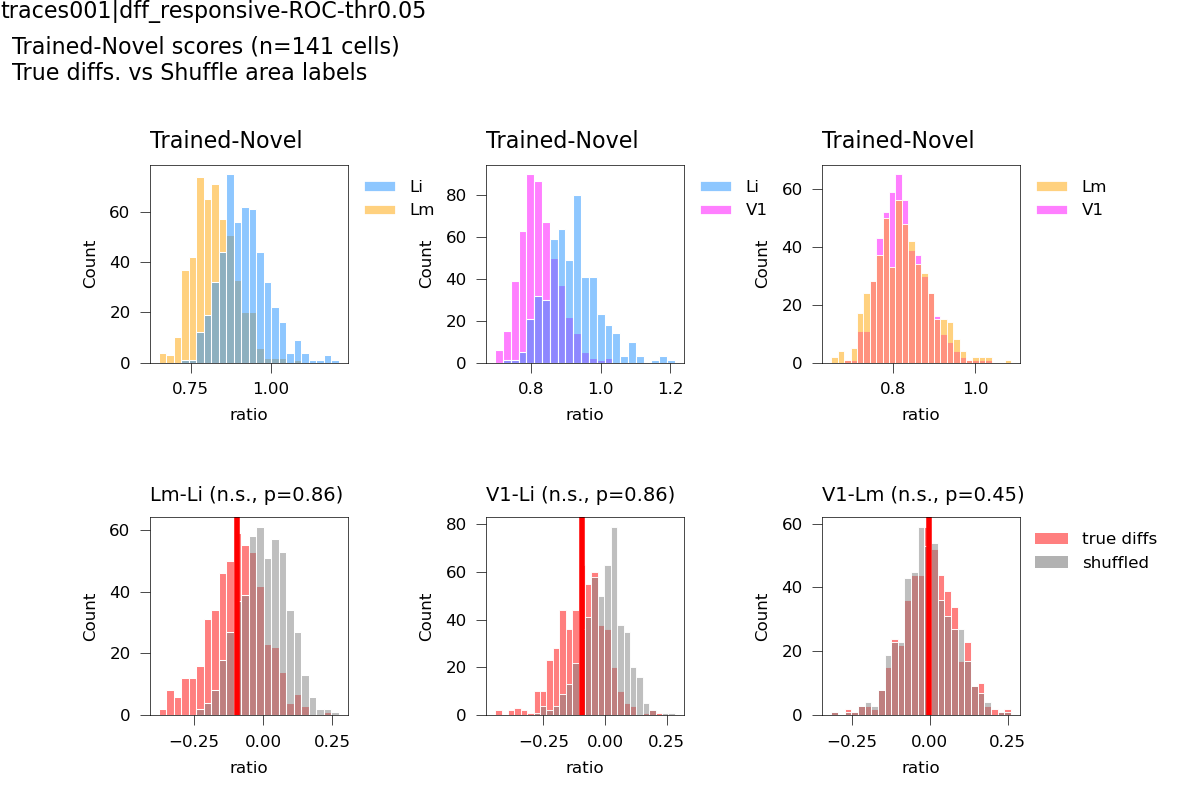

/tmp/ipykernel_87409/2842581210.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meandiffs = diffs_.groupby('condition').mean()
/tmp/ipykernel_87409/2842581210.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meandiffs = diffs_.groupby('condition').mean()
/tmp/ipykernel_87409/2842581210.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meandiffs = diffs_.groupby('condition').mean()


In [329]:
%matplotlib notebook
# v1='Li'
# v2 = 'Lm'
shuff_colors = {'true': 'r', 'shuffled': [0.5]*3}                      
s_list=[]
fig, axn = pl.subplots(2, 3, figsize=(6,4), dpi=100)
for vi, (vpair, diffs_) in enumerate(diff_v_shuff.groupby('area_pair')):
    v1, v2 = vpair.split('_')
    # Diff distribution for each area (TRAINED-NOVEL)
    ax=axn[0, vi] 
    curr_scores = DIFFS[(DIFFS.condition=='true') 
                        & (DIFFS.visual_area.isin([v1, v2]))].copy()
    sns.histplot(x=metric_name, data=curr_scores, ax=ax,
                 palette=area_colors, hue='visual_area', edgecolor='w')
    pplot.sns_histplot_legend(ax, title='')
    ax.set_title('Trained-Novel', loc='left')
    
    # shuffled
    ax=axn[1, vi]
    sns.histplot(x=metric_name, data=diffs_, ax=ax, alpha=0.5, edgecolor='w',
                hue='condition', palette=shuff_colors)
    meandiffs = diffs_.groupby('condition').mean()
    true_diff = float(meandiffs.loc['true'][metric_name])
    shuff_diff = float(meandiffs.loc['shuffled'][metric_name])
    if vi!=2:
        ax.legend_.remove()
    shuff_dist = np.array(sorted(diffs_[diffs_.condition=='shuffled'][metric_name].values))
    n_extreme = len(np.where(shuff_dist>=true_diff)[0])
    pv = n_extreme/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    if vi==2:
        legh = pplot.custom_legend_markers(colors=['r', [0.4]*3], 
                                    labels=['true diffs', 'shuffled'], 
                                    use_patch=True, alpha=0.5)
        ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
    ax.axvline(x=true_diff, ls='-', c='r', lw=2)
    ax.set_title('%s-%s (%s, p=%.2f)' % (v1, v2, sig_str, pv),
                 loc='left', fontsize=7)
    stats0 = pd.Series({'v1': v1, 'v2': v2, 'true_diff': true_diff,
                       'shuff_diff': shuff_diff, 'p-val': pv})
    s_list.append(stats0)
for ax in axn.flat:
    ax.set_box_aspect(1)
pl.subplots_adjust(wspace=0.7, hspace=0.7, bottom=0.1, top=0.8, right=0.85)

pplot.label_figure(fig,data_id)
fig.text(0.01, 0.9, 
    'Trained-Novel scores (n=%i cells)\nTrue diffs. vs Shuffle area labels' \
         % curr_ncells, fontsize=8)

figname = 'trained_vs_novel_shuffle_area_labels_n%icells' % curr_ncells

# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [330]:
pd.concat(s_list, axis=1).T

,v1,v2,true_diff,shuff_diff,p-val
0,Lm,Li,-0.093824,0.001705,0.86
1,V1,Li,-0.095058,-0.006209,0.858
2,V1,Lm,-0.001234,-0.007914,0.448


In [331]:
statsdf = pd.concat(s_list, axis=1).T
statsdf['p-val'] = statsdf['p-val'].astype(float)
statsdf['reject_null_uncorr'] = statsdf['p-val']<0.05

post_hoc='fdr_bh'
reject, pvals_corr = pg.multicomp(statsdf['p-val'].values, method=post_hoc)
statsdf['reject_null'] = reject
statsdf['p_adjusted'] = pvals_corr
statsdf.round(2)

,v1,v2,true_diff,shuff_diff,p-val,reject_null_uncorr,reject_null,p_adjusted
0,Lm,Li,-0.093824,0.001705,0.86,False,False,0.86
1,V1,Li,-0.095058,-0.006209,0.86,False,False,0.86
2,V1,Lm,-0.001234,-0.007914,0.45,False,False,0.86


In [332]:
import scikit_posthocs as sp

In [333]:
# import sys
# !pip install --prefix {sys.prefix} scikit-posthocs

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


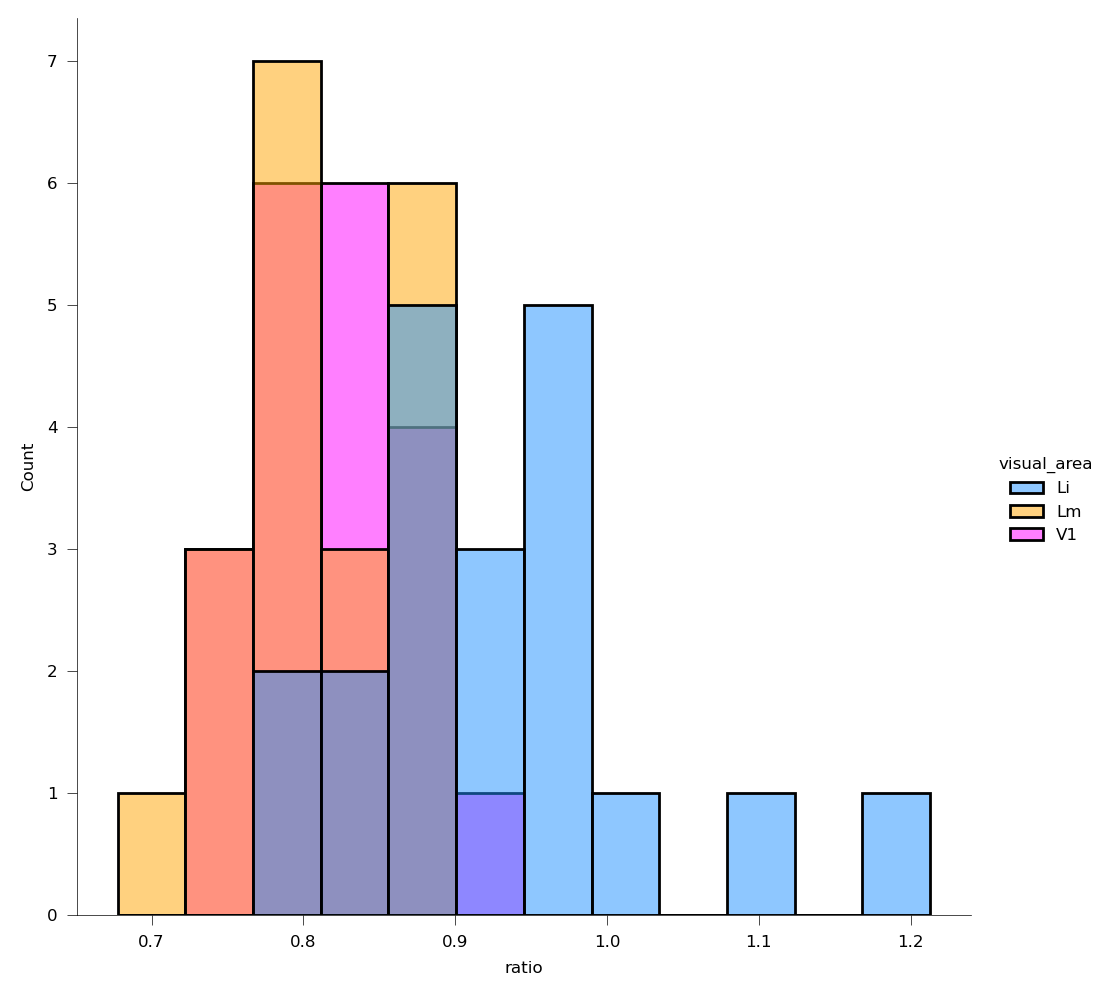

In [342]:
# d = diff_v_shuff[diff_v_shuff['area_pair']=='V1_Li'].groupby('condition').sample(10)
#d = diff_v_shuff[diff_v_shuff['area_pair']=='V1_Li']
d = diff_scores.groupby('visual_area').sample(20, replace=False)
#fig, ax = pl.subplots()
sns.displot(data=d, x=metric_name, hue='visual_area', ax=ax, 
            palette=area_colors)

In [343]:
# Kruskal-wallist:  nonparametric, one-way ANOVA on ranks
# Mann-Whitney U (Wilcoxon rank-sum test):  nonparametric, indep T_test
# Wilcoxon signed-rank test:  non-parametric version of paired T-test
# pg.kruskal(data=diff_scores, dv='difference', between='visual_area')

pg.kruskal(data=d, dv=metric_name, between='visual_area')

,Source,ddof1,H,p-unc
Kruskal,visual_area,2,24.964262,0.000004


In [344]:
# Perform Dunn's post-hoc test with Bonferroni correction
posthoc_results = sp.posthoc_dunn(d, val_col=metric_name, 
                                  group_col='visual_area', p_adjust='bonferroni')
print(posthoc_results)

          Li       Lm        V1
Li  1.000000  0.00001  0.000286
Lm  0.000010  1.00000  1.000000
V1  0.000286  1.00000  1.000000


In [337]:
%matplotlib notebook

<IPython.core.display.Javascript object>


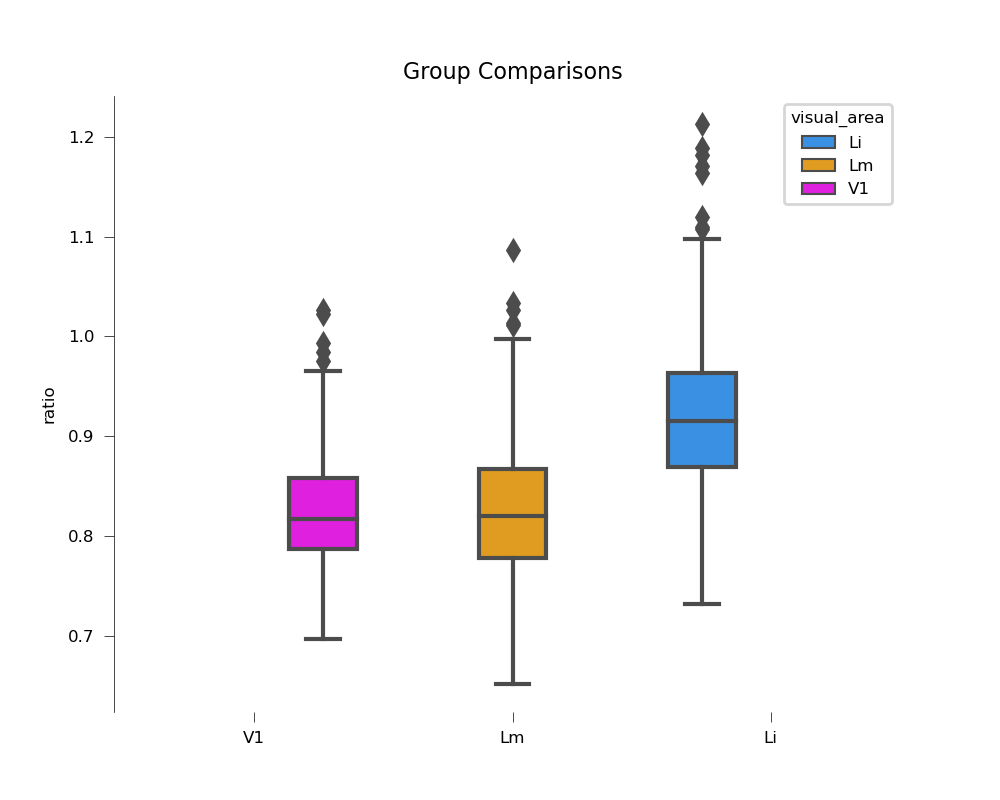

In [339]:
# Example boxplot
fig, ax = pl.subplots()
sns.boxplot(x='visual_area', y=metric_name, ax=ax, data=d,
            hue='visual_area', palette=area_colors,
            order=visual_areas)
pl.title('Group Comparisons')
sns.despine(trim=False,bottom=True, offset=4)
ax.set_xlabel('')
pl.show()

In [117]:
reject

array([False, False, False])

In [118]:
v1='V1'
v2 = 'Li'

curr_scores = diff_scores[diff_scores.visual_area.isin([v1, v2])].copy()

#v1_vals = diff_scores[diff_scores.visual_area==v1]['difference'].values
#v2_vals = diff_scores[diff_scores.visual_area==v2]['difference'].values

true_scores = data_scores[data_scores.visual_area.isin([v1, v2])].copy()
true_diffs = dec.calculate_difference_scores(true_scores)
print(true_scores.shape, true_diffs.shape)

(2000, 18) (1000, 4)


In [119]:
shuff_df = iterdf[(iterdf.n_cells==curr_ncells) & (iterdf.condition=='data')].copy()
shuff_df.head()

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
45000,0.137028,0.000721,0.8,1.0,0.875000,1.0,8875,data,10.0,10.0,38,False,375,141,6958,Li,aggregate,True,intact,0.0
45002,0.137028,0.000721,0.8,1.0,0.868421,1.0,8875,data,10.0,20.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45003,0.137028,0.000721,0.8,1.0,0.710526,1.0,8875,data,10.0,30.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45004,0.137028,0.000721,0.8,1.0,0.631579,1.0,8875,data,10.0,40.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45005,0.137028,0.000721,0.8,1.0,0.605263,1.0,8875,data,10.0,50.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0


In [120]:
for (t1, t2), g in shuff_df[shuff_df.iteration==0]\
            .groupby(['train_transform', 'test_transform']):
    g

In [121]:
g

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
48774,0.000731,0.000294,0.866667,1.0,0.875000,1.0,2267,data,50.0,50.0,38,False,0,141,2609,Li,aggregate,True,intact,0.0
585024,0.000826,0.000352,0.935556,1.0,1.000000,1.0,3889,data,50.0,50.0,58,False,0,141,9573,Lm,aggregate,True,intact,0.0
795024,0.000829,0.000348,0.935556,1.0,0.833333,1.0,8859,data,50.0,50.0,58,False,0,141,967,V1,aggregate,True,intact,0.0


In [122]:
shuffle_groups = ['train_transform', 'test_transform','iteration']

shuff_df['visual_area'] = shuff_df.groupby(shuffle_groups)['visual_area']\
                                          .transform(np.random.permutation)
shuff_df.head()

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
45000,0.137028,0.000721,0.8,1.0,0.875000,1.0,8875,data,10.0,10.0,38,False,375,141,6958,Li,aggregate,True,intact,0.0
45002,0.137028,0.000721,0.8,1.0,0.868421,1.0,8875,data,10.0,20.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45003,0.137028,0.000721,0.8,1.0,0.710526,1.0,8875,data,10.0,30.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45004,0.137028,0.000721,0.8,1.0,0.631579,1.0,8875,data,10.0,40.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45005,0.137028,0.000721,0.8,1.0,0.605263,1.0,8875,data,10.0,50.0,38,True,375,141,6958,Lm,aggregate,True,intact,0.0


In [123]:
shuff_scores = dec.average_within_iterations_by_ncells(shuff_df, 
                                analysis_type='by_ncells',
                                test_type='size_single',
                                grouper=['visual_area', 'condition', 'iteration'])
#shuff_scores = shuff_scores0[shuff_scores0.visual_area.isin([v1, v2])].copy()
shuff_diff_scores = dec.calculate_difference_scores(shuff_scores)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2583: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_iters = iterdf.groupby(grouper).mean().reset_index()


<IPython.core.display.Javascript object>


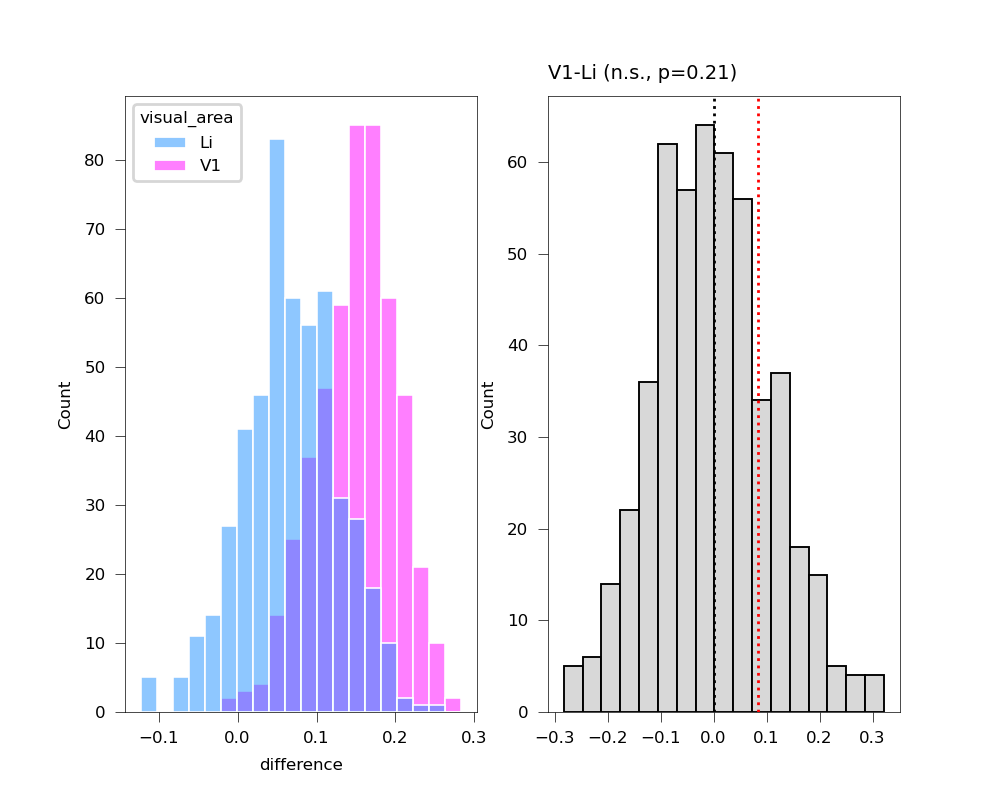

Text(0.0, 1.0, 'V1-Li (n.s., p=0.21)')

In [124]:
fig, axn = pl.subplots(1, 2)
ax=axn[0]
sns.histplot(x='difference', data=curr_scores, ax=ax,
                 palette=area_colors, hue='visual_area', edgecolor='w')

v1_vals = diff_scores[diff_scores.visual_area==v1]['difference'].values
v2_vals = diff_scores[diff_scores.visual_area==v2]['difference'].values
curr_diffs = v1_vals - v2_vals

v1_vals = shuff_diff_scores[shuff_diff_scores.visual_area==v1]['difference'].values
v2_vals = shuff_diff_scores[shuff_diff_scores.visual_area==v2]['difference'].values
curr_diffs_shuff = v1_vals - v2_vals
true_diff = np.mean(curr_diffs)

ax=axn[1]
sns.histplot(curr_diffs_shuff, ax=ax, color=[0.8]*3)
#sns.histplot(curr_diffs, ax=ax, color='r')

shuff_dist = np.array(sorted(curr_diffs_shuff))
n_extreme = len(np.where(shuff_dist>=true_diff)[0])
pv = n_extreme/len(shuff_dist)
if pv<0.05:
    sig_str='**' if pv<0.01 else '*'
else:
    sig_str='n.s.'
ax.axvline(x=0, ls=':', c='k', lw=1)
ax.axvline(x=true_diff, ls=':', c='r', lw=1)

ax.set_title('%s-%s (%s, p=%.2f)' % (v1, v2, sig_str, pv),
             loc='left', fontsize=7)


In [ ]:
import

In [136]:
shuff_diffs

,visual_area,n_cells,iteration,difference
0,Li,120,0,0.111872
2000,V1,120,0,0.189368
2,Li,120,1,0.021779
2002,V1,120,1,0.045221
4,Li,120,2,0.148382
...,...,...,...,...
3994,V1,120,997,0.098654
1996,Li,120,998,0.043073
3996,V1,120,998,0.157426
1998,Li,120,999,0.058500


In [117]:
# shuff_scores = data_scores[data_scores.visual_area.isin([v1, v2])].copy()
# # vals =shuff_scores['visual_area'].sample(frac=1).values
# shuff_scores['visual_area'] = shuff_scores.groupby(['novel', 'iteration'])['visual_area']\
#                                           .transform(np.random.permutation)
# shuff_scores[shuff_scores.visual_area==v1]
# # shuff_scores['visual_area'] = vals
# # shuff_diffs = dec.calculate_difference_scores(shuff_scores)
# d1 = shuff_scores[shuff_scores.visual_area==v1][['heldout_test_score', 'novel']]
# d2 = shuff_scores[shuff_scores.visual_area==v2][['heldout_test_score', 'novel']]
# d1

In [118]:
# diffs1 = d1[d1.novel].sort_index()['heldout_test_score'].values \
#             - d1[~d1.novel].sort_index()['heldout_test_score']
# diffs2 = d2[d2.novel].sort_index()['heldout_test_score'].values \
#             - d2[~d2.novel].sort_index()['heldout_test_score']

# diffs_ = diffs1 - diffs2

<IPython.core.display.Javascript object>


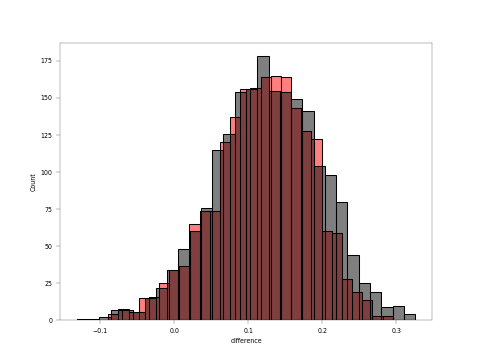

<AxesSubplot:xlabel='difference', ylabel='Count'>

In [119]:
fig, ax =pl.subplots()
sns.histplot(x='difference', data=true_diffs, color='r', alpha=0.5, ax=ax)
# sns.histplot(diffs_, color=[0.8]*3, alpha=0.5, ax=ax)

sns.histplot(x='difference', data=shuff_diffs, color='k', alpha=0.5, ax=ax)


In [20]:
import itertools

<IPython.core.display.Javascript object>


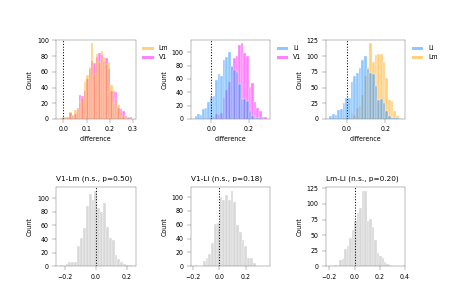

In [21]:
v1='Li'
v2 = 'Lm'
v_combos = list(itertools.combinations(visual_areas, 2))

fig, axn = pl.subplots(2, 3, figsize=(6,4), dpi=100)
for vi, (v1, v2) in enumerate(v_combos):

    curr_scores = diff_scores[diff_scores.visual_area.isin([v1, v2])].copy()
    ax=axn[0, vi]
    sns.histplot(x='difference', data=curr_scores, ax=ax,
                 palette=area_colors, hue='visual_area', edgecolor='w')
    ax.axvline(x=0, ls=':', c='k', lw=1)
    pplot.sns_histplot_legend(ax, title='')
    v1_vals = diff_scores[diff_scores.visual_area==v1]['difference'].values
    v2_vals = diff_scores[diff_scores.visual_area==v2]['difference'].values
    curr_diffs = v1_vals - v2_vals

    ax=axn[1, vi]
    sns.histplot(curr_diffs, ax=ax, color=[0.8]*3, edgecolor='w')
    shuff_dist = np.array(sorted(curr_diffs))
    n_extreme = len(np.where(shuff_dist<=0)[0])
    pv = n_extreme/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    ax.axvline(x=0, ls=':', c='k', lw=1)
    ax.set_title('%s-%s (%s, p=%.2f)' % (v1, v2, sig_str, pv),
                 loc='left', fontsize=7)
for ax in axn.flat:
    ax.set_box_aspect(1)
pl.subplots_adjust(wspace=0.7, hspace=0.7, bottom=0.1, right=0.9)

In [62]:
len(shuff_dist)

1000

In [30]:
import itertools

<IPython.core.display.Javascript object>


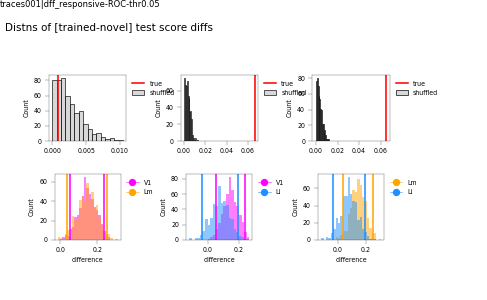

In [31]:
n_shuff=500
p_vals = []
metric='difference'
v_combos = list(itertools.combinations(visual_areas, 2))

fig, axn = pl.subplots(2, len(v_combos), figsize=(6.5,4))
for ai, (v1, v2) in enumerate(v_combos):
    v_list = [v1, v2]
    a_ = diff_scores[diff_scores.visual_area==v1][metric]
    b_ = diff_scores[diff_scores.visual_area==v2][metric]
    true_ = abs(a_.mean() - b_.mean())

    combined_ = pd.concat([a_, b_], axis=0, ignore_index=True).values
    shuff_=[]
    for n in range(n_shuff):
        np.random.shuffle(combined_)
        i = np.mean(combined_[0:500])
        v = np.mean(combined_[500:])
        diff_s = abs(i-v)
        shuff_.append(diff_s)
    shuff = np.array(shuff_)
    pv_ = len(np.where(shuff>=true_)[0])/n_shuff
    p_vals.append(pd.Series({'v1': v1, 'v2': v2, 'p_val': pv_}))
    
    ax=axn[0, ai]
    sns.histplot(shuff, color=[0.8]*3, ax=ax, label='shuffled')
    ax.axvline(x=true_, color='r', label='true')
    ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

    ax=axn[1, ai]
    c1= area_colors[v1]
    c2 = c2=area_colors[v2]
    sns.histplot(x=metric, hue='visual_area', ax=ax,
                 data=diff_scores[diff_scores.visual_area.isin(v_list)], 
                 palette={v1:c1, v2: c2}, fill=True, edgecolor=None)
    c_lo, c_hi = hutils.get_empirical_ci(diff_scores[diff_scores.visual_area==v1][metric].values)
    ax.axvline(x=c_lo, color=c1)
    ax.axvline(x=c_hi, color=c1)

    c_lo, c_hi = hutils.get_empirical_ci(diff_scores[diff_scores.visual_area==v2][metric].values)
    ax.axvline(x=c_lo, color=c2)
    ax.axvline(x=c_hi, color=c2)
    leg_h = pplot.custom_legend_markers(colors=[c1, c2], labels=[v1, v2])
    ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.75, wspace=0.7, hspace=0.5)
fig.text(0.01, 0.9, "Distns of [trained-novel] test score diffs")

pplot.label_figure(fig, data_id)


In [49]:

diffs = dec.permutation_test_trained_v_novel(data_df)
diffs.head()

,visual_area,n_cells,iteration,difference,trained_v_novel
0,Li,128,0,0.111842,true
1,Lm,128,0,0.044828,true
2,V1,128,0,0.165230,true
3,Li,128,1,0.144737,true
4,Lm,128,1,0.177586,true


<IPython.core.display.Javascript object>


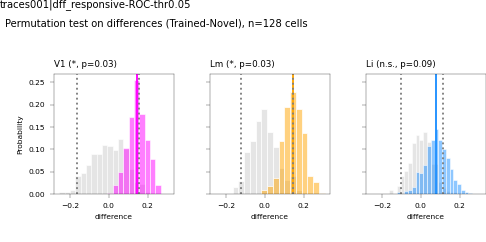

In [51]:
shuff_color=[0.8]*3

fig, axn = pl.subplots(1,3, figsize=(6,3), sharex=True, sharey=True)

for va, vg in diffs.groupby(['visual_area']):
    vi = visual_areas.index(va)
    ax=axn[vi]
    curr_colors= area_colors.copy()
    sns.histplot(x='difference', hue='trained_v_novel', data=vg, ax=ax, alpha=0.5,
                palette={'shuffled': shuff_color, 'true': curr_colors[va]},
                stat='probability', legend=True, common_norm=False,
                edgecolor='w')
    
    meas_mean = vg[vg.trained_v_novel=='true']['difference'].mean()
    ax.axvline(x=meas_mean, color=curr_colors[va])
    shuff_dist = sorted(vg[vg.trained_v_novel=='shuffled']['difference'].values)
    n_extreme = len(np.where(shuff_dist>=meas_mean)[0])
    pv = n_extreme/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    ax.set_title('%s (%s, p=%.2f)' % (va, sig_str, pv), loc='left', fontsize=7)
    
    c_lo, c_hi = hutils.get_empirical_ci(shuff_dist)
    ax.axvline(x=c_lo, color=[0.5]*3, ls=':')
    ax.axvline(x=c_hi, color=[0.5]*3, ls=':')
    if va=='Li':
        leg_h = pplot.custom_legend_markers(colors=[[0.5]*3, shuff_color],
                                           labels=['true', 'shuffled'], 
                                           use_patch=True)
        ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False,
                 title=None)
    else:
        ax.legend_.remove()
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.8, wspace=0.3, hspace=0.5)
fig.text(0.01, 0.9,\
         "Permutation test on differences (Trained-Novel), n=%i cells" \
         % max_ncells, fontsize=8)

pplot.label_figure(fig, data_id)

In [34]:
# Shuffle
currd = byiter_data[byiter_data['n_cells']==max_ncells].copy()
d_list = []
for i in range(n_iters):
    d_=[]
    for va, all_vals in currd.groupby(['visual_area']):
        half_vs = all_vals['heldout_test_score'].sample(n=n_iters, replace=False)
        unused = [v for v in all_vals.index if v not in half_vs.index]
        other_vs = all_vals.loc[unused, 'heldout_test_score'].sample(n_iters)
        diff_ = np.mean(half_vs.values - other_vs.values)
        df_ = pd.DataFrame({diff_}, index=[i], columns=[va])
        d_.append(df_)
    d_list.append(pd.concat(d_, axis=1))
shuff_diff = pd.concat(d_list, axis=0).stack().reset_index()\
                .rename(columns={0: 'difference', 'level_1': 'visual_area'})
shuff_diff['condition'] = 'shuffled'
shuff_diff = shuff_diff.drop('level_0', 1)

In [35]:
# combine
true_diff = pd.concat([pd.DataFrame({'difference': d['difference'].values}, 
                                     index=[va]*n_iters) \
    for va, d in diffdf[diffdf['n_cells']==max_ncells].groupby('visual_area')], 
                       axis=0) #.reset_index(drop=True)
true_diff['condition'] = 'data'
true_diff['visual_area'] = true_diff.index.tolist()
true_diff = true_diff.reset_index(drop=True)
diffs = pd.concat([true_diff, shuff_diff], axis=0)

<IPython.core.display.Javascript object>


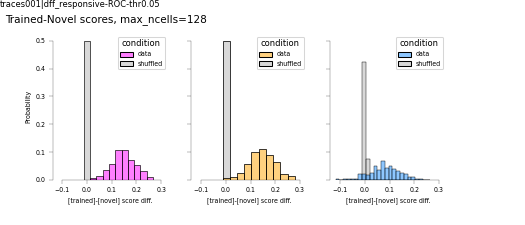

In [36]:
fig, axn = pl.subplots(1,3, figsize=(7, 3), sharex=True, sharey=True)
for vi, (va, df_) in enumerate(diffs.groupby('visual_area')):
    ax=axn[visual_areas.index(va)]
    sns.histplot(x='difference', hue='condition', data=df_, ax=ax, alpha=0.5,
                palette={'data': area_colors[va], 'shuffled': [0.7]*3},
                 stat='probability', legend=True)
#                 cumulative=True, element='poly', fill=False)
    #true_mean = diffdf[diffdf.visual_area==va]['difference'].mean()
    #ax.axvline(x=true_mean, color=area_colors[va])
pl.subplots_adjust(left=0.1, right=0.85, bottom=0.2, top=0.85)
for ax in axn:
    ax.set_xlabel('[trained]-[novel] score diff.')
    #ax.legend(bbox_to_anchor=(1,1), loc='upper right', frameon=False, fontsize=6,)
    #          title='')
sns.despine(trim=True)

fig.text(0.01, 0.9, 'Trained-Novel scores, max_ncells=%i' % max_ncells)

pplot.label_figure(fig, data_id)

figname = 'hist_trained_vs_novel__%s' % aggr_id
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [37]:
import scipy.stats as spstats

In [38]:
data = [diffdf.loc[ids, 'difference'].values \
        for ids in diffdf.groupby('visual_area').groups.values()]

In [39]:
H, p = spstats.kruskal(*data)
H, p

(1022.2714023609312, 1.038928053918243e-222)

In [40]:
# import scikit_posthocs as skp
# skp.post_(df, val_col='SepalWidth', group_col='Species', p_adjust = 'holm')

<IPython.core.display.Javascript object>


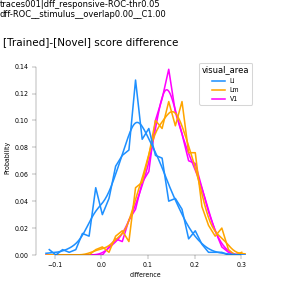

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00 dist_trained_vs_novel_difference__dff-ROC__stimulus__overlap0.00__C1.00


In [41]:
fig, ax = pl.subplots(figsize=(4,4))
sns.histplot(x='difference', hue='visual_area', data=diffs[diffs.condition=='data'],
             ax=ax,
            cumulative=False, element='poly', fill=False, kde=True,
            palette=area_colors, stat='probability', common_norm=False)
# sns.histplot(x='difference', hue='visual_area', data=diffs[diffs.condition=='shuffled'],
#              ax=ax, line_kws={'linestyle': ':'},
#             cumulative=True, element='poly', fill=False,
#             palette=area_colors, stat='probability', common_norm=False)

pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
sns.despine(trim=True)
fig.text(0.01, 0.85, '[Trained]-[Novel] score difference')
pl.subplots_adjust(bottom=0.15, top=0.8, left=0.12, right=0.85)
#figname='cumdist_trained_vs_novel_difference__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
figname='dist_trained_vs_novel_difference__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
pl.savefig(os.path.join(curr_dst_dir,  '%s.svg' % figname))
print(curr_dst_dir, figname)

In [42]:
diffs.groupby(['visual_area', 'condition']).count()

difference
visual_area condition            
Li          data              500
            shuffled          500
Lm          data              500
            shuffled          500
V1          data              500
            shuffled          500

In [240]:
pg.kruskal(data=plotd, dv='difference', between='visual_area')

,Source,ddof1,H,p-unc
Kruskal,visual_area,2,364.44635,7.269099e-80


<IPython.core.display.Javascript object>


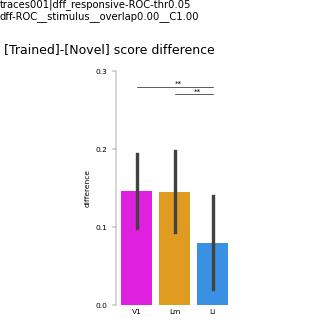

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00 bar_trained_vs_novel_difference__dff-ROC__stimulus__overlap0.00__C1.00


In [243]:
plotd = diffs[diffs.condition=='data'].copy()
posthoc='fdr_bh'
ylim=0.3
fig, ax = pl.subplots(figsize=(4,4))
sns.barplot(x='visual_area', y='difference', data=plotd,
             ax=ax, palette=area_colors, order=visual_areas, ci='sd')

sts = pg.pairwise_ttests(data=plotd, dv='difference', between='visual_area',
                         parametric=False, padjust=posthoc, effsize='eta-square')  
pplot.annotate_multicomp_by_area(ax, sts, y_loc=0.27, offset=0.01)

ax.set_box_aspect(2)
ax.set_ylim([0, ylim])
ax.set_yticks(np.linspace(0, ylim, 4))
sns.despine(bottom=True, trim=True)
ax.tick_params(which='both', axis='x', size=0)
ax.set_xlabel('')
pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
fig.text(0.01, 0.85, '[Trained]-[Novel] score difference')
pl.subplots_adjust(bottom=0.15, top=0.8, left=0.12, right=0.85)

figname='bar_trained_vs_novel_difference__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
pl.savefig(os.path.join(curr_dst_dir,  '%s.svg' % figname))
print(curr_dst_dir, figname)


In [148]:
all_vals =  diffs[diffs.condition=='data']
# li_vals = all_vals[all_vals.visual_area=='Li']['difference']
# lm_vals = all_vals[all_vals.visual_area=='Lm']['difference']
# v1_vals = all_vals[all_vals.visual_area=='V1']['difference']


In [194]:
import itertools
import pingouin as pg


<IPython.core.display.Javascript object>


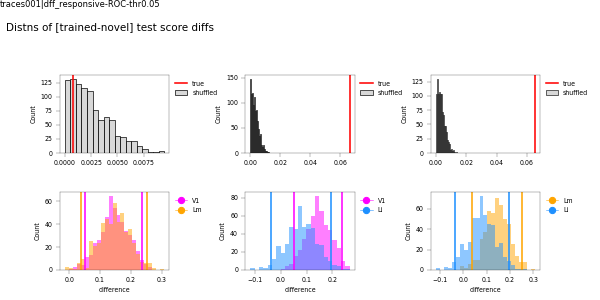

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00 shuffle_test_trained-v-novel


In [234]:
n_shuff=1000
p_vals = []
metric='difference'
# v1='Lm'
# v2='Li'
v_combos = list(itertools.combinations(visual_areas, 2))

fig, axn = pl.subplots(2, len(v_combos), figsize=(8,4))

for ai, (v1, v2) in enumerate(v_combos):
    v_list = [v1, v2]
    a_ = all_vals[all_vals.visual_area==v1][metric]
    b_ = all_vals[all_vals.visual_area==v2][metric]
    true_ = abs(a_.mean() - b_.mean())

    combined_ = pd.concat([a_, b_], axis=0, ignore_index=True).values
    shuff_=[]
    for n in range(n_shuff):
        np.random.shuffle(combined_)
        i = np.mean(combined_[0:500])
        v = np.mean(combined_[500:])
        diff_s = abs(i-v)
        shuff_.append(diff_s)
    shuff = np.array(shuff_)
    pv_ = len(np.where(shuff>true_)[0])/n_shuff
    p_vals.append(pd.Series({'v1': v1, 'v2': v2, 'p_val': pv_}))
    
    ax=axn[0, ai]
    sns.histplot(shuff, color=[0.8]*3, ax=ax, label='shuffled')
    ax.axvline(x=true_, color='r', label='true')
    ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

    ax=axn[1, ai]
    c1= area_colors[v1]
    c2 = c2=area_colors[v2]
    sns.histplot(x=metric, hue='visual_area', ax=ax,
                 data=all_vals[all_vals.visual_area.isin(v_list)], 
                 palette={v1:c1, v2: c2}, fill=True, edgecolor=None)
    c_lo, c_hi = hutils.get_empirical_ci(all_vals[all_vals.visual_area==v1][metric].values)
    ax.axvline(x=c_lo, color=c1)
    ax.axvline(x=c_hi, color=c1)

    c_lo, c_hi = hutils.get_empirical_ci(all_vals[all_vals.visual_area==v2][metric].values)
    ax.axvline(x=c_lo, color=c2)
    ax.axvline(x=c_hi, color=c2)
    leg_h = pplot.custom_legend_markers(colors=[c1, c2], labels=[v1, v2])
    ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
    
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.75, wspace=0.7, hspace=0.5)
fig.text(0.01, 0.9, "Distns of [trained-novel] test score diffs")

pplot.label_figure(fig, data_id)

figname = 'shuffle_test_trained-v-novel'
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
print(curr_dst_dir, figname)


In [200]:
pd.concat(p_vals, axis=1).T


,v1,v2,p_val
0,V1,Lm,0.823
1,V1,Li,0.0
2,Lm,Li,0.0


In [195]:
pg.multicomp(p_vals, alpha=0.05, method='bonf')

(array([False,  True,  True]), array([1., 0., 0.]))

In [205]:
curr_dst_dir

'/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00'

## Check if NOVEL v TRAINED diff

In [124]:
# df_ = mean_df[(mean_df['n_cells']==max_ncells) 
#             & (mean_df['condition']=='data')].copy()
# df_.groupby(['visual_area', 'novel']).count()

# df_ = mean_df[(mean_df['n_cells']==max_ncells) 
#             & ~(mean_df['novel'])].copy().reset_index(drop=True)
# df_.groupby(['visual_area', 'condition']).count()

df_ = mean_df[(mean_df['n_cells']==96) 
            & (mean_df['condition']=='data')].copy().reset_index(drop=True)
df_.groupby(['visual_area', 'novel']).count()

condition  iteration  n_cells  fit_time  score_time  \
visual_area novel                                                        
Li          False        500        500      500       500         500   
            True         500        500      500       500         500   
Lm          False        500        500      500       500         500   
            True         500        500      500       500         500   
V1          False        500        500      500       500         500   
            True         500        500      500       500         500   

                   test_score  train_score  heldout_test_score    C  randi  \
visual_area novel                                                            
Li          False         500          500                 500  500    500   
            True          500          500                 500  500    500   
Lm          False         500          500                 500  500    500   
            True          500          500                 500  500    500   
V1          False         500          500                 500  500    500   
            True          500          500                 500  500    500   

                   train_transform  test_transform  n_trials  randi_cells  \
visual_area novel                                                           
Li          False              500             500       500          500   
            True               500             500       500          500   
Lm          False              500             500       500          500   
            True               500             500       500          500   
V1          False              500             500       500          500   
            True               500             500       500          500   

                   intact  overlap_thr  
visual_area novel                       
Li          False     500          500  
            True      500          500  
Lm          False     500          500  
            True      500          500  
V1          False     500          500  
            True      500          500

<IPython.core.display.Javascript object>


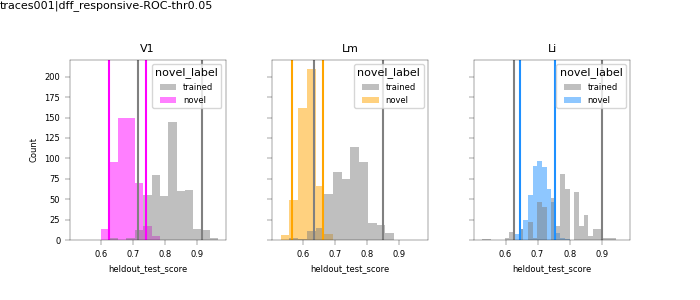

In [125]:
metric='heldout_test_score'
# c1='cornflowerblue'
# c2 = [0.8]*3
v1='novel'
v2='trained'
df_['novel_label'] = [v1 if v else v2 for v in df_['novel'].values]
fig, axn = pl.subplots(1,3, figsize=(7,3), sharex=True, sharey=True)

for va, vg in df_.groupby('visual_area'):
    ax=axn[visual_areas.index(va)]
    c1 = area_colors[va]
    c2 = [0.5]*3
#     a_ = vg[(vg.novel)][metric]
#     b_ = vg[~(vg.novel)][metric]
#     true_ = b_.mean() - a_.mean()
#     combined_ = pd.concat([a_, b_], axis=0, ignore_index=True).values
#     shuff_=[]
#     for n in range(1000):
#         np.random.shuffle(combined_)
#         i = np.mean(combined_[0:500])
#         v = np.mean(combined_[500:])
#         ds_ = abs(i-v)
#         shuff_.append(ds_)
#     shuff = np.array(shuff_)
#     sns.histplot(shuff, color=[0.8]*3, ax=ax, label='shuffled')
#     ax.axvline(x=true_, color='r', label='true')
#     print(len(np.where(shuff>true_)[0])/2000.)
#     pl.subplots_adjust(bottom=0.2, right=0.8)

    sns.histplot(x='heldout_test_score', hue='novel_label', data=vg, ax=ax,
                palette={v1: c1, v2: c2}, fill=True, edgecolor=None)
#     ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

    c_lo, c_hi = hutils.get_empirical_ci(vg[vg.novel][metric].values)
    ax.axvline(x=c_lo, color=c1)
    ax.axvline(x=c_hi, color=c1)

    c_lo, c_hi = hutils.get_empirical_ci(vg[~(vg.novel)][metric].values)
    ax.axvline(x=c_lo, color=c2)
    ax.axvline(x=c_hi, color=c2)
    ax.set_title(va)
    
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.8, wspace=0.3)
pplot.label_figure(fig, data_id)

# figname = 'distns_95CI_test_trained-v-novel'
# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
# print(curr_dst_dir, figname)


In [131]:
len(np.where(shuff<true_)[0])/1000.


1.667

In [357]:
import pingouin as pg

In [375]:
plotd = df_[['visual_area', 'novel', 'heldout_test_score', 'iteration']].copy().reset_index(drop=True)
plotd['subject'] = ['%s_%i' % (va, ni) for va, ni in plotd[['visual_area', 'iteration']].values]
plotd.head()

,visual_area,novel,heldout_test_score,iteration,subject
0,Li,False,0.825000,0,Li_0
1,Li,True,0.713158,0,Li_0
2,Li,False,0.900000,1,Li_1
3,Li,True,0.755263,1,Li_1
4,Li,False,0.650000,2,Li_2


In [372]:
from pingouin import mixed_anova, read_dataset
df = read_dataset('mixed_anova')
df

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [378]:
pg.mixed_anova(data=plotd, dv='heldout_test_score', within='novel', 
              between='visual_area', subject='subject', correction=True)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,visual_area,2.954740,2,1497,1.477370,822.690953,9.019487e-242,0.52361,NaN
1,novel,11.500601,1,1497,11.500601,8041.647076,0.000000e+00,0.84306,1.0
2,Interaction,0.721420,2,1497,0.360710,252.221841,3.962799e-95,0.25204,NaN


<IPython.core.display.Javascript object>


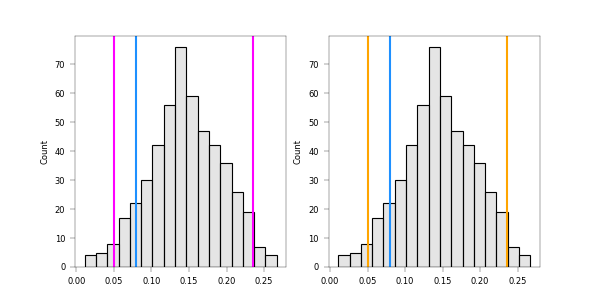

In [229]:
all_vals =  diffs[diffs.condition=='data']
li_vals = all_vals[all_vals.visual_area=='Li']['difference'].values
lm_vals = all_vals[all_vals.visual_area=='Lm']['difference'].values
v1_vals = all_vals[all_vals.visual_area=='V1']['difference'].values

fig, axn = pl.subplots(1,2, figsize=(6,3))
ax=axn[0]
compare_v = 'V1'
for ax, compare_v in zip(axn.flat, ['V1', 'Lm']):
    compare_vals = all_vals[all_vals.visual_area==compare_v]['difference'].values
    sns.histplot(v1_vals, color=[0.8]*3, alpha=0.5, ax=ax)
    c_lo, c_hi = hutils.get_empirical_ci(v1_vals, ci=0.95)
    ax.axvline(x=c_lo, color=area_colors[compare_v])
    ax.axvline(x=c_hi, color=area_colors[compare_v])

    # # sns.histplot(x='trained_minus_novel', data=plotd[plotd['rfs']=='matched'], ax=ax)
    mean_v = np.mean(li_vals)
    ax.axvline(x=mean_v, color=area_colors['Li'])

In [168]:
diffs[diffs.condition=='data'].groupby('visual_area').describe()

difference                                                    \
                 count      mean       std       min       25%       50%   
visual_area                                                                
Li               500.0  0.064928  0.056877 -0.093421  0.023684  0.068421   
Lm               500.0  0.065104  0.055064 -0.100862  0.028664  0.064080   
V1               500.0  0.140040  0.043500 -0.012356  0.113937  0.139655   

                                 
                  75%       max  
visual_area                      
Li           0.106579  0.198684  
Lm           0.101509  0.242816  
V1           0.169325  0.262356

## Split generalization score by TRAIN vs TEST

In [169]:
# results.loc[results['heldout_test_score']==0, 'heldout_test_score'] = 0.000000000001
metric='heldout_test_score'
drop_cols = ['fit_time', 'score_time', 'train_score', 'test_score']
cols = [c for c in iterdf.columns if c not in drop_cols]
data_df = iterdf[(iterdf.condition=='data')][cols].copy().reset_index(drop=True)

data_df['generalization'] = None
data_df['train_test_diff'] = None
for tr, g in data_df.groupby(['train_transform']):
    train_vals = g[g.train_transform==g.test_transform][metric].values
    for te, gg in g.groupby(['test_transform']):
        data_df.loc[gg.index, 'generalization']= gg[metric]/train_vals
        data_df.loc[gg.index, 'train_test_diff'] = tr-te
data_df['generalization'] = data_df['generalization'].astype(float)
data_df['train_test_abs'] = np.abs(data_df['train_test_diff']).astype(float)
data_df['train_test_diff'] = data_df['train_test_diff'].astype(float)

In [170]:
itergroup_cols = ['n_cells', 'visual_area', 'novel', 
                  'test_transform', 'train_test_diff', 'iteration']
datameans_per_iter = data_df.groupby(itergroup_cols).mean().reset_index()
# means_per_iter

In [171]:
for tr, g in data_df[(data_df.n_cells==max_ncells)].groupby(['train_transform']):
    train_vals = g[g.train_transform==g.test_transform]['heldout_test_score'].values
    print(tr, train_vals.min(), train_vals.max()) #dropna().shape)

10.0 0.16666666666666666 1.0
20.0 0.25 1.0
30.0 0.25 1.0
40.0 0.25 1.0
50.0 0.375 1.0


In [172]:
datameans_per_iter.groupby(['visual_area', 'n_cells', 
                            'train_transform', 'test_transform']).count()

novel  train_test_diff  \
visual_area n_cells train_transform test_transform                           
Li          1       10.0            10.0              500              500   
                                    20.0              500              500   
                                    30.0              500              500   
                                    40.0              500              500   
                                    50.0              500              500   
...                                                   ...              ...   
V1          96      50.0            10.0              500              500   
                                    20.0              500              500   
                                    30.0              500              500   
                                    40.0              500              500   
                                    50.0              500              500   

                                                    iteration  \
visual_area n_cells train_transform test_transform              
Li          1       10.0            10.0                  500   
                                    20.0                  500   
                                    30.0                  500   
                                    40.0                  500   
                                    50.0                  500   
...                                                       ...   
V1          96      50.0            10.0                  500   
                                    20.0                  500   
                                    30.0                  500   
                                    40.0                  500   
                                    50.0                  500   

                                                    heldout_test_score    C  \
visual_area n_cells train_transform test_transform                            
Li          1       10.0            10.0                           500  500   
                                    20.0                           500  500   
                                    30.0                           500  500   
                                    40.0                           500  500   
                                    50.0                           500  500   
...                                                                ...  ...   
V1          96      50.0            10.0                           500  500   
                                    20.0                           500  500   
                                    30.0                           500  500   
                                    40.0                           500  500   
                                    50.0                           500  500   

                                                    randi  n_trials  \
visual_area n_cells train_transform test_transform                    
Li          1       10.0            10.0              500       500   
                                    20.0              500       500   
                                    30.0              500       500   
                                    40.0              500       500   
                                    50.0              500       500   
...                                                   ...       ...   
V1          96      50.0            10.0              500       500   
                                    20.0              500       500   
                                    30.0              500       500   
                                    40.0              500       500   
                                    50.0              500       500   

                                                    randi_cells  intact  \
visual_area n_cells train_transform test_transform                        
Li          1       10.0            10.0                    500     500   
              

visual_area
Li      inf
Lm      inf
V1    0.956
Name: generalization, dtype: float64
visual_area
Li      NaN
Lm      NaN
V1    0.303
Name: generalization, dtype: float64


<IPython.core.display.Javascript object>


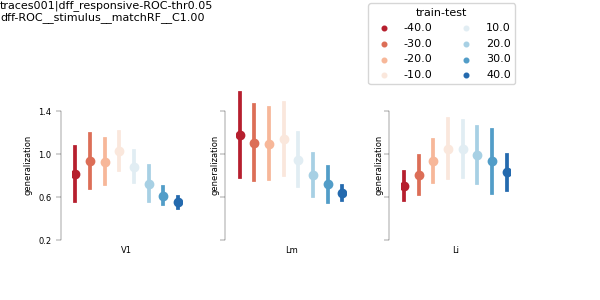

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/controls generalization_split_traintest__dff-ROC__stimulus__matchRF__C1.00


In [173]:
metric='generalization'
size_metric='train_test_diff'
multi_comp_test='fdr_bh'

curr_ncells=max_ncells

print(datameans_per_iter.groupby(['visual_area'])[metric].mean().round(3))
print(datameans_per_iter.groupby(['visual_area'])[metric].std().round(3))

plotd = datameans_per_iter[(datameans_per_iter.novel) 
                         & (datameans_per_iter['n_cells']==curr_ncells)].copy()

diff_palette = 'Greys' if size_metric=='train_test_abs' else 'RdBu'

#fig, axn = pl.subplots(1,2, figsize=(6.5,3), dpi=dpi, sharex=True, sharey=False)
fig, axn = pl.subplots(1, 3, figsize=(6,3), sharex=True,sharey=True)

# PLOT 2
for va, vg in plotd.groupby(['visual_area']):
    ax = axn[visual_areas.index(va)]
    sns.pointplot(x=size_metric, y=metric, hue=size_metric, data=vg, ax=ax, 
             palette=diff_palette, scale=0.8, 
              dodge=0.5, join=False, ci='sd', markers='o')
    ax.legend_.remove()
    ax.set_yticks(np.linspace(0.2, 1.4, 4))
    ax.set_ylim([0.2, 1.6])    
    ax.set_xlabel(va)
axn[-1].legend(bbox_to_anchor=(1.1, 1.), loc='lower right', title='train-test', markerscale=0.5, fontsize=8,
         ncol=2)

pl.tight_layout()
pl.subplots_adjust(left=0.12, right=0.85, wspace=0.5, top=0.7, bottom=0.2)

sns.despine(bottom=True, offset=8, trim=True)
ax.tick_params(which='both', axis='x', size=0)
ax.set_xticks([])

pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
figname='generalization_split_traintest__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
#figname='genratio_meanbyiter_split_traintransform__%s_%s_%s2' % (dset_str, shuffle_str, errstr)

pl.savefig(os.path.join(curr_dst_dir,  '%s.svg' % figname))
print(curr_dst_dir, figname)

<IPython.core.display.Javascript object>


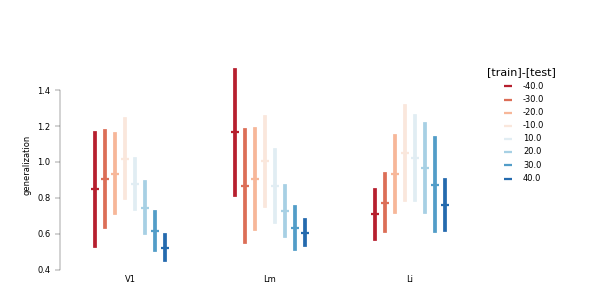

In [112]:
#fig, axn = pl.subplots(1,2, figsize=(6.5,3), dpi=dpi, sharex=True, sharey=False)
fig, ax = pl.subplots(figsize=(6,3))

# PLOT 2

sns.pointplot(x='visual_area', y=metric, data=plotd, ax=ax, 
           hue=size_metric, order=visual_areas, palette=diff_palette, scale=0.8, 
              dodge=0.5, join=False, ci='sd', markers='_')
ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False, 
         title='[train]-[test]')
ax.tick_params(which='both', axis='x', size=0)
ax.set_xlabel('')
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.8)
sns.despine(bottom=True, trim=True)


In [53]:
import statsmodels.api as sm

In [54]:
iterdf.

SyntaxError: invalid syntax (<ipython-input-54-f61dbf0a6fe9>, line 1)

In [ ]:
if analysis_type=='by_fov':
    bw_cond_colors = dict((k, [0.7]*3) for k in ['data', 'shuffled'])
    cond_colors = {'data': 'cornflowerblue', 'shuffled': [0.3]*3}


    fig, axn = pl.subplots(1,2, figsize=(6.5, 3), sharex=True, sharey=True)
    for ai, (is_intact, df) in enumerate(DF.groupby('intact')):
        ax=axn[ai]
        corr_str = 'Intact' if is_intact else 'No corrs.'
        ax.set_title(corr_str)
        sns.barplot(x='visual_area', y=metric, data=df, ax=ax,
                hue='condition', order=visual_areas, ci=None, palette=bw_cond_colors)
        sns.stripplot(x='visual_area', y=metric, data=df, ax=ax,
                hue='condition', order=visual_areas, palette=cond_colors,
                jitter=False, dodge=True, s=4)

        ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
        ax.legend_.remove()
    axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left')
    pl.subplots_adjust(left=0.1, right=0.85, bottom=0.2, top=0.85,
                      wspace=0.3)

    pplot.label_figure(fig, aggr_id)
    figname = 'intact_vs_indep'
    pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [167]:
dst_dir

'/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov'

<IPython.core.display.Javascript object>


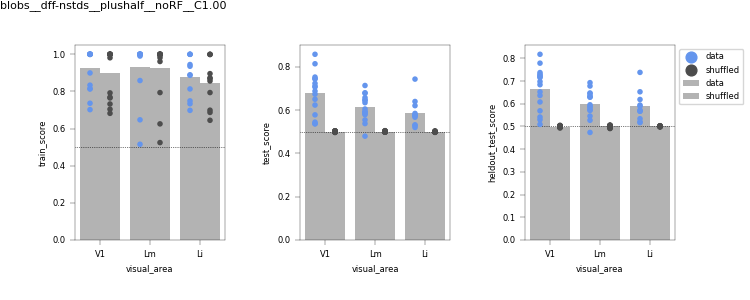

In [168]:
bw_cond_colors = dict((k, [0.7]*3) for k in ['data', 'shuffled'])
cond_colors = {'data': 'cornflowerblue', 'shuffled': [0.3]*3}

metric_list = ['train_score', 'test_score', 'heldout_test_score']

fig, axn = pl.subplots(1, len(metric_list), figsize=(2.5*len(metric_list), 3))
for ai, metric in enumerate(metric_list):
    ax=axn[ai]
    sns.barplot(x='visual_area', y=metric, data=df, ax=ax,
            hue='condition', order=visual_areas, ci=None, palette=bw_cond_colors)
    sns.stripplot(x='visual_area', y=metric, data=df, ax=ax,
            hue='condition', order=visual_areas, palette=cond_colors,
            jitter=False, dodge=True, s=4)
    
    ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
    ax.legend_.remove()
axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.85,
                  wspace=0.5)

pplot.label_figure(fig, aggr_id)
figname = 'aggr_performance_metrics'
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [183]:
DF

,visual_area,datakey,condition,novel,train_transform,test_transform,fit_time,score_time,test_score,train_score,heldout_MI,heldout_aMI,heldout_log2MI,heldout_test_score,C,randi,n_trials,iteration,n_cells,intact
0,Li,20190422_JC076_fov1,data,False,10_20_30_40,10_20_30_40,0.011768,0.000475,0.526641,0.886592,0.011687,0.001365,0.016860,0.532917,1.0,4768.29,240.0,49.5,68.0,True
1,Li,20190422_JC076_fov1,data,False,10_20_30_50,10_20_30_50,0.011565,0.000462,0.536306,0.892078,0.009614,-0.001699,0.013870,0.537917,1.0,5212.13,240.0,49.5,68.0,True
2,Li,20190422_JC076_fov1,data,False,10_20_40_50,10_20_40_50,0.011347,0.000465,0.538179,0.895239,0.012811,0.002960,0.018483,0.543958,1.0,5011.99,240.0,49.5,68.0,True
3,Li,20190422_JC076_fov1,data,False,10_30_40_50,10_30_40_50,0.014093,0.000477,0.512409,0.872984,0.010969,0.000264,0.015826,0.523542,1.0,4847.80,240.0,49.5,68.0,True
4,Li,20190422_JC076_fov1,data,False,20_30_40_50,20_30_40_50,0.010543,0.000458,0.544619,0.900372,0.016351,0.008292,0.023590,0.552708,1.0,4803.09,240.0,49.5,68.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,V1,20191006_JC110_fov1,shuffled,False,10_20_30_40,10_20_30_40,0.005513,0.000721,0.496537,1.000000,0.009511,-0.000313,0.013722,0.493585,1.0,5074.57,264.0,49.5,221.0,True
626,V1,20191006_JC110_fov1,shuffled,False,10_20_30_50,10_20_30_50,0.005505,0.000725,0.507712,1.000000,0.012291,0.003762,0.017732,0.476226,1.0,5191.18,264.0,49.5,221.0,True
627,V1,20191006_JC110_fov1,shuffled,False,10_20_40_50,10_20_40_50,0.005547,0.000745,0.502377,1.000000,0.009419,-0.000424,0.013588,0.503962,1.0,5052.93,264.0,49.5,221.0,True
628,V1,20191006_JC110_fov1,shuffled,False,10_30_40_50,10_30_40_50,0.005608,0.000740,0.491905,1.000000,0.011515,0.002673,0.016613,0.510189,1.0,4996.48,264.0,49.5,221.0,True


<IPython.core.display.Javascript object>


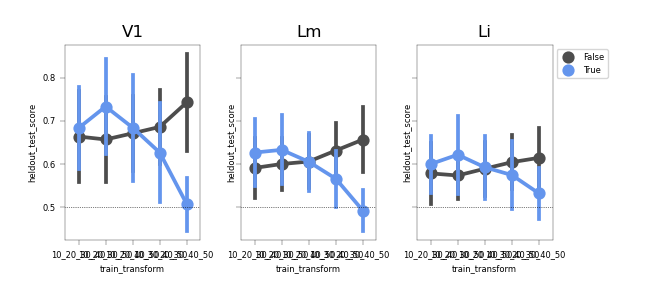

In [206]:
plotd = DF[DF.intact].copy()

keys = [True, False]
bw_cond_colors = dict((k, [0.7]*3) for k in keys)
#cond_colors = {'data': 'cornflowerblue', 'shuffled': [0.3]*3}
cond_colors = {keys[0]: 'cornflowerblue', keys[1]: [0.3]*3}

metric = 'heldout_test_score'
fig, axn = pl.subplots(1,3, figsize=(6.5, 3), sharex=True, sharey=True)
for vi, (va, df) in enumerate(DF.groupby('visual_area')):
    ai = visual_areas.index(va)
    ax=axn[ai]
    ax.set_title(va)
    sns.pointplot(x='train_transform', y=metric, data=df, ax=ax,
            hue='novel', ci='sd', palette=cond_colors)
#     sns.stripplot(x='visual_area', y=metric, data=df, ax=ax,
#             hue='condition', order=visual_areas, palette=cond_colors,
#             jitter=False, dodge=True, s=4)
    
    ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
    ax.legend_.remove()
axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(left=0.1, right=0.85, bottom=0.2, top=0.85,
                  wspace=0.3)

# pplot.label_figure(fig, aggr_id)
# figname = 'intact_vs_indep'
# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))